In [1]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
pd.set_option('display.max_columns', 500)

# Import supplementary visualization code visuals.py
#import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset`
data = pd.read_csv("ott5.csv")

# Success - Display the first record
display(data.head(n=1))


C:\Users\sf2990\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


chnl_prtnr_cust_cd  eop base_pkg_prd_nm       chnl_actvt_chnl_grp  \
0        1.810190e+14    1   Live a Little  NR/LSP/Indirect eComm/CP   

  wirls_hshld_ind dtv_hshld_ind uvrs_tv_hshld_ind uvrs_int_hshld_ind  \
0               Y             N                 N                  N   

  uvrs_vce_hshld_ind  day_0_dur  day_1_dur  day_2_dur  day_3_dur vsf ebvs  \
0                  N          0          0          0          0   0    1   

   avg_startup_time  rebuffering_ratio  sports_flag  news_flag  kids_flag  \
0            5285.0                0.0            0          0          0   

   live_perc  dvr_perc  vod_perc  ch_ct  email_flag  aud_flag  devices  
0        0.0       0.0       0.0      0           0         0        0

In [2]:
def func(row):
    if row['wirls_hshld_ind'] == '?':
        return 0
    elif row['wirls_hshld_ind'] =='N':
        return 0
    else:
        return 1

data['wirls'] = data.apply(func, axis=1)

In [3]:
def func(row):
    if row['dtv_hshld_ind'] == '?':
        return 0
    elif row['dtv_hshld_ind'] =='N':
        return 0
    else:
        return 1

data['dtv'] = data.apply(func, axis=1)

In [4]:
def func(row):
    if row['uvrs_tv_hshld_ind'] == '?':
        return 0
    elif row['uvrs_tv_hshld_ind'] =='N':
        return 0
    else:
        return 1

data['uvtv'] = data.apply(func, axis=1)

In [5]:
def func(row):
    if row['uvrs_int_hshld_ind'] == '?':
        return 0
    elif row['uvrs_int_hshld_ind'] =='N':
        return 0
    else:
        return 1

data['uvint'] = data.apply(func, axis=1)

In [6]:
def func(row):
    if row['uvrs_vce_hshld_ind'] == '?':
        return 0
    elif row['uvrs_vce_hshld_ind'] =='N':
        return 0
    else:
        return 1

data['uvvce'] = data.apply(func, axis=1)

In [7]:
data = data.drop(['wirls_hshld_ind','dtv_hshld_ind','uvrs_tv_hshld_ind','uvrs_int_hshld_ind','uvrs_vce_hshld_ind'],axis='columns')

In [8]:
dummies=pd.get_dummies(data.base_pkg_prd_nm)
data = pd.concat([data,dummies],axis='columns')
dummies=pd.get_dummies(data.chnl_actvt_chnl_grp)
data = pd.concat([data,dummies],axis='columns')

data['content_flag'] = data['sports_flag']+data['news_flag']+data['kids_flag']
data['3_day_dur'] = data['day_0_dur']+data['day_1_dur']+data['day_2_dur']+data['day_3_dur']

In [9]:
data['active_days']=data['day_0_dur'].apply(lambda x : 1 if x > 0 else 0)
data['active_days']=data['active_days']+data['day_1_dur'].apply(lambda x : 1 if x > 0 else 0)
data['active_days']=data['active_days']+data['day_2_dur'].apply(lambda x : 1 if x > 0 else 0)
data['active_days']=data['active_days']+data['day_3_dur'].apply(lambda x : 1 if x > 0 else 0)

In [84]:
#alternate way
data['active_days']=data[['day_0_dur','day_1_dur','day_2_dur','day_3_dur']].apply(lambda x : int(x.day_0_dur > 0)+int(x.day_1_dur > 0)+int(x.day_2_dur > 0)+int(x.day_3_dur > 0),axis=1)

In [54]:
data['active_days']=data[['day_0_dur','day_1_dur','day_2_dur','day_3_dur']].apply(lambda x : print(x),axis=1)

day_0_dur    0.039445
day_1_dur    0.000052
day_2_dur    0.000000
day_3_dur    0.000000
Name: 0, dtype: float64
day_0_dur    0.001232
day_1_dur    0.025124
day_2_dur    0.000169
day_3_dur    0.000000
Name: 1, dtype: float64
day_0_dur    0.034935
day_1_dur    0.015540
day_2_dur    0.010858
day_3_dur    0.000000
Name: 2, dtype: float64
day_0_dur    0.004098
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 3, dtype: float64
day_0_dur    0.006459
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 4, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 5, dtype: float64
day_0_dur    0.003336
day_1_dur    0.000265
day_2_dur    0.000236
day_3_dur    0.000000
Name: 6, dtype: float64
day_0_dur    0.000668
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 7, dtype: float64
day_0_dur    0.122863
day_1_dur    0.029547
day_2_dur    0.068969
day_3_dur    0.001363
Name: 8, dtype: float64
day_0_dur   

Name: 405, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 406, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 407, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 408, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 409, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 410, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 411, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 412, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.040215
Name: 413, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.029391
Name: 414, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 415, dtype: fl

day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 822, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 823, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 824, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 825, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 826, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 827, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 828, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 829, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 830, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 831, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur

Name: 1171, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 1172, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.221959
day_3_dur    0.053784
Name: 1173, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.152685
day_3_dur    0.022301
Name: 1174, dtype: float64
day_0_dur    0.00000
day_1_dur    0.00000
day_2_dur    0.00049
day_3_dur    0.00000
Name: 1175, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.002525
day_3_dur    0.002864
Name: 1176, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000462
Name: 1177, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.051897
day_3_dur    0.019896
Name: 1178, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.002646
Name: 1179, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 118

Name: 1499, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 1500, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000110
day_2_dur    0.031515
day_3_dur    0.043918
Name: 1501, dtype: float64
day_0_dur    0.000000
day_1_dur    0.073437
day_2_dur    0.000000
day_3_dur    0.000000
Name: 1502, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 1503, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.009744
day_3_dur    0.000000
Name: 1504, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.001321
day_3_dur    0.000000
Name: 1505, dtype: float64
day_0_dur    0.000000
day_1_dur    0.003189
day_2_dur    0.024477
day_3_dur    0.061278
Name: 1506, dtype: float64
day_0_dur    0.004895
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 1507, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 1508, dtype: float6

Name: 1903, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 1904, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.047013
day_3_dur    0.028080
Name: 1905, dtype: float64
day_0_dur    0.000000
day_1_dur    0.011369
day_2_dur    0.000000
day_3_dur    0.000000
Name: 1906, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 1907, dtype: float64
day_0_dur    0.024313
day_1_dur    0.000000
day_2_dur    0.126177
day_3_dur    0.020172
Name: 1908, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 1909, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 1910, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.039553
day_3_dur    0.000000
Name: 1911, dtype: float64
day_0_dur    0.056729
day_1_dur    0.063568
day_2_dur    0.005370
day_3_dur    0.106332
Name: 1912, dtype: float64
day_0_dur    0.011

Name: 2227, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 2228, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 2229, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 2230, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 2231, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 2232, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 2233, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 2234, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 2235, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 2236, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 2237, dtype: float64
day_0_dur    0.0
day_1_

Name: 2542, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 2543, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 2544, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 2545, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 2546, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 2547, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 2548, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 2549, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 2550, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 2551, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 2552, dtype: float64
day_0_dur    0.0
day_1_

Name: 2956, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 2957, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.040254
Name: 2958, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 2959, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 2960, dtype: float64
day_0_dur    0.000970
day_1_dur    0.000000
day_2_dur    0.021864
day_3_dur    0.000000
Name: 2961, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.015603
day_3_dur    0.063358
Name: 2962, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 2963, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.015654
day_3_dur    0.000000
Name: 2964, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.012543
day_3_dur    0.000000
Name: 2965, dtype: float64
day_0_dur    0.0
d

Name: 3296, dtype: float64
day_0_dur    0.000000
day_1_dur    0.038900
day_2_dur    0.037075
day_3_dur    0.191593
Name: 3297, dtype: float64
day_0_dur    0.000000
day_1_dur    0.115545
day_2_dur    0.226037
day_3_dur    0.050169
Name: 3298, dtype: float64
day_0_dur    0.000000
day_1_dur    0.008517
day_2_dur    0.076666
day_3_dur    0.000244
Name: 3299, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000511
Name: 3300, dtype: float64
day_0_dur    0.000000
day_1_dur    0.119536
day_2_dur    0.028028
day_3_dur    0.064695
Name: 3301, dtype: float64
day_0_dur    0.000000
day_1_dur    0.017371
day_2_dur    0.033212
day_3_dur    0.000940
Name: 3302, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.004061
day_3_dur    0.000000
Name: 3303, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 3304, dtype: float64
day_0_dur    0.046379
day_1_dur    0.000000
day_2_dur    0.040883
day_3_d

Name: 3643, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000179
Name: 3644, dtype: float64
day_0_dur    0.000000
day_1_dur    0.063556
day_2_dur    0.066922
day_3_dur    0.089329
Name: 3645, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 3646, dtype: float64
day_0_dur    0.000000
day_1_dur    0.080273
day_2_dur    0.075336
day_3_dur    0.000000
Name: 3647, dtype: float64
day_0_dur    0.000000
day_1_dur    0.014184
day_2_dur    0.170931
day_3_dur    0.065646
Name: 3648, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 3649, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 3650, dtype: float64
day_0_dur    0.000000
day_1_dur    0.028827
day_2_dur    0.039696
day_3_dur    0.000000
Name: 3651, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 3652, dtype: float64
day_0_dur    0.000

day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 3999, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.009811
day_3_dur    0.051663
Name: 4000, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.025081
day_3_dur    0.002398
Name: 4001, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.006079
day_3_dur    0.002554
Name: 4002, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.025533
day_3_dur    0.000000
Name: 4003, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.026229
day_3_dur    0.010895
Name: 4004, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.001191
day_3_dur    0.000000
Name: 4005, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 4006, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.145964
day_3_dur    0.019935
Name: 4007, dtype: float64
day_0

Name: 4415, dtype: float64
day_0_dur    0.008613
day_1_dur    0.000074
day_2_dur    0.000722
day_3_dur    0.000016
Name: 4416, dtype: float64
day_0_dur    0.024501
day_1_dur    0.007781
day_2_dur    0.045657
day_3_dur    0.000000
Name: 4417, dtype: float64
day_0_dur    0.038034
day_1_dur    0.017608
day_2_dur    0.000000
day_3_dur    0.000000
Name: 4418, dtype: float64
day_0_dur    0.000668
day_1_dur    0.020867
day_2_dur    0.075952
day_3_dur    0.040605
Name: 4419, dtype: float64
day_0_dur    0.117948
day_1_dur    0.116610
day_2_dur    0.085358
day_3_dur    0.121516
Name: 4420, dtype: float64
day_0_dur    0.000257
day_1_dur    0.000000
day_2_dur    0.010947
day_3_dur    0.000000
Name: 4421, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 4422, dtype: float64
day_0_dur    0.018245
day_1_dur    0.018093
day_2_dur    0.021704
day_3_dur    0.017331
Name: 4423, dtype: float64
day_0_dur    0.171885
day_1_dur    0.024377
day_2_dur    0.052893
day_3_d

Name: 4737, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 4738, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 4739, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 4740, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 4741, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 4742, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 4743, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 4744, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 4745, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 4746, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 4747, dtype: float64
day_0_dur    0.0
day_1_

Name: 5073, dtype: float64
day_0_dur    0.014033
day_1_dur    0.009528
day_2_dur    0.011124
day_3_dur    0.004442
Name: 5074, dtype: float64
day_0_dur    0.005762
day_1_dur    0.000000
day_2_dur    0.000101
day_3_dur    0.000000
Name: 5075, dtype: float64
day_0_dur    0.001762
day_1_dur    0.002888
day_2_dur    0.000000
day_3_dur    0.000000
Name: 5076, dtype: float64
day_0_dur    0.000802
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.017787
Name: 5077, dtype: float64
day_0_dur    0.023373
day_1_dur    0.023465
day_2_dur    0.022312
day_3_dur    0.006938
Name: 5078, dtype: float64
day_0_dur    0.001747
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.004914
Name: 5079, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 5080, dtype: float64
day_0_dur    0.047839
day_1_dur    0.000026
day_2_dur    0.026896
day_3_dur    0.000000
Name: 5081, dtype: float64
day_0_dur    0.004217
day_1_dur    0.003763
day_2_dur    0.002018
day_3_d

Name: 5506, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 5507, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 5508, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 5509, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 5510, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 5511, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 5512, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 5513, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 5514, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 5515, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 5516, dtype: float64
day_0_dur    0.0
day_1_

day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 5821, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 5822, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 5823, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 5824, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.076438
day_3_dur    0.028571
Name: 5825, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 5826, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.010368
day_3_dur    0.010032
Name: 5827, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.001579
day_3_dur    0.000000
Name: 5828, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.007434
day_3_dur    0.000000
Name: 5829, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000

Name: 6153, dtype: float64
day_0_dur    0.026115
day_1_dur    0.000000
day_2_dur    0.007122
day_3_dur    0.003313
Name: 6154, dtype: float64
day_0_dur    0.018502
day_1_dur    0.007005
day_2_dur    0.000000
day_3_dur    0.000225
Name: 6155, dtype: float64
day_0_dur    0.167787
day_1_dur    0.032772
day_2_dur    0.001191
day_3_dur    0.000000
Name: 6156, dtype: float64
day_0_dur    0.038242
day_1_dur    0.015973
day_2_dur    0.018461
day_3_dur    0.026404
Name: 6157, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000197
day_2_dur    0.000000
day_3_dur    0.000000
Name: 6158, dtype: float64
day_0_dur    0.000000
day_1_dur    0.010735
day_2_dur    0.000000
day_3_dur    0.034888
Name: 6159, dtype: float64
day_0_dur    0.000658
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 6160, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 6161, dtype: float64
day_0_dur    0.00000
day_1_dur    0.00000
day_2_dur    0.00000
day_3_dur 

Name: 6528, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 6529, dtype: float64
day_0_dur    0.001836
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 6530, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000020
day_2_dur    0.000000
day_3_dur    0.000199
Name: 6531, dtype: float64
day_0_dur    0.030560
day_1_dur    0.046922
day_2_dur    0.095591
day_3_dur    0.033511
Name: 6532, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000405
day_2_dur    0.000000
day_3_dur    0.000000
Name: 6533, dtype: float64
day_0_dur    0.000000
day_1_dur    0.011927
day_2_dur    0.112018
day_3_dur    0.046798
Name: 6534, dtype: float64
day_0_dur    0.041425
day_1_dur    0.034004
day_2_dur    0.116332
day_3_dur    0.049365
Name: 6535, dtype: float64
day_0_dur    0.001322
day_1_dur    0.000000
day_2_dur    0.000021
day_3_dur    0.000000
Name: 6536, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name:

Name: 6920, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.036349
Name: 6921, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 6922, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.032606
Name: 6923, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 6924, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000098
Name: 6925, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 6926, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.004608
Name: 6927, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 6928, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.020221
Name: 6929, dtype: float64
day_0_dur    0.000

Name: 7244, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 7245, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 7246, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 7247, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 7248, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 7249, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 7250, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 7251, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 7252, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 7253, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 7254, dtype: float64
day_0_dur    0.0
day_1_

Name: 7572, dtype: float64
day_0_dur    0.001673
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 7573, dtype: float64
day_0_dur    0.000099
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 7574, dtype: float64
day_0_dur    0.050765
day_1_dur    0.012378
day_2_dur    0.000536
day_3_dur    0.000000
Name: 7575, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 7576, dtype: float64
day_0_dur    0.013973
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 7577, dtype: float64
day_0_dur    0.029288
day_1_dur    0.001137
day_2_dur    0.006282
day_3_dur    0.000000
Name: 7578, dtype: float64
day_0_dur    0.015899
day_1_dur    0.001135
day_2_dur    0.000000
day_3_dur    0.000000
Name: 7579, dtype: float64
day_0_dur    0.008642
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 7580, dtype: float64
day_0_dur    0.000000
day_1_dur    0.008900
day_2_dur    0.000469
day_3_d

Name: 8011, dtype: float64
day_0_dur    0.000000
day_1_dur    0.037859
day_2_dur    0.042094
day_3_dur    0.076537
Name: 8012, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000449
day_2_dur    0.000000
day_3_dur    0.000000
Name: 8013, dtype: float64
day_0_dur    0.000000
day_1_dur    0.005994
day_2_dur    0.000000
day_3_dur    0.000000
Name: 8014, dtype: float64
day_0_dur    0.000000
day_1_dur    0.003005
day_2_dur    0.054362
day_3_dur    0.011926
Name: 8015, dtype: float64
day_0_dur    0.000000
day_1_dur    0.004806
day_2_dur    0.000916
day_3_dur    0.008464
Name: 8016, dtype: float64
day_0_dur    0.000000
day_1_dur    0.011494
day_2_dur    0.084649
day_3_dur    0.020211
Name: 8017, dtype: float64
day_0_dur    0.073153
day_1_dur    0.000000
day_2_dur    0.007054
day_3_dur    0.000000
Name: 8019, dtype: float64
day_0_dur    0.042355
day_1_dur    0.009452
day_2_dur    0.032009
day_3_dur    0.019635
Name: 8020, dtype: float64
day_0_dur    0.000559
day_1_dur    0.000407
day_2_dur

Name: 8338, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 8339, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 8340, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 8341, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 8342, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 8343, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 8344, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 8345, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 8346, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 8348, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 8349, dtype: float64
day_0_dur    0.0
day_1_

Name: 8671, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 8673, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 8674, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 8675, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 8676, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 8677, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 8678, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 8679, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 8680, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 8681, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 8682, dtype: float64
day_0_dur    0.0
day_1_

day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000469
day_3_dur    0.000000
Name: 9060, dtype: float64
day_0_dur    0.000000
day_1_dur    0.035566
day_2_dur    0.018706
day_3_dur    0.000000
Name: 9061, dtype: float64
day_0_dur    0.000000
day_1_dur    0.113547
day_2_dur    0.392582
day_3_dur    0.208935
Name: 9062, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000033
Name: 9063, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 9064, dtype: float64
day_0_dur    0.000000
day_1_dur    0.003564
day_2_dur    0.000000
day_3_dur    0.000000
Name: 9065, dtype: float64
day_0_dur    0.000000
day_1_dur    0.022879
day_2_dur    0.000266
day_3_dur    0.000000
Name: 9066, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 9067, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 9068, dtype: float64
day_0_dur    0.0
day_1_du

Name: 9463, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 9464, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 9465, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 9466, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 9467, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 9468, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 9469, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 9471, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 9472, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 9473, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 9474, dtype: float64
day_0_dur    0.0
day_1_

Name: 9781, dtype: float64
day_0_dur    0.001718
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 9782, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 9783, dtype: float64
day_0_dur    0.008939
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 9784, dtype: float64
day_0_dur    0.169975
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 9785, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 9786, dtype: float64
day_0_dur    0.014013
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.004227
Name: 9787, dtype: float64
day_0_dur    0.000000
day_1_dur    0.002776
day_2_dur    0.003854
day_3_dur    0.009850
Name: 9788, dtype: float64
day_0_dur    0.002277
day_1_dur    0.000000
day_2_dur    0.011740
day_3_dur    0.002782
Name: 9789, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 9790, dtype: float6

Name: 10135, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 10136, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 10137, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 10138, dtype: float64
day_0_dur    0.001133
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 10139, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 10140, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 10141, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 10142, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 10143, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 10144, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 10145, dtype: 

Name: 10554, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.036741
day_3_dur    0.007683
Name: 10555, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.168968
day_3_dur    0.049905
Name: 10556, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.001524
day_3_dur    0.006977
Name: 10557, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.005226
day_3_dur    0.000000
Name: 10558, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000172
Name: 10559, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.019259
day_3_dur    0.005812
Name: 10560, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 10561, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 10562, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.076484
day_3_dur    0.053

Name: 10888, dtype: float64
day_0_dur    0.443637
day_1_dur    0.010084
day_2_dur    0.116083
day_3_dur    0.055642
Name: 10889, dtype: float64
day_0_dur    0.000099
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 10890, dtype: float64
day_0_dur    0.070608
day_1_dur    0.007582
day_2_dur    0.000000
day_3_dur    0.000000
Name: 10891, dtype: float64
day_0_dur    0.080622
day_1_dur    0.049768
day_2_dur    0.065508
day_3_dur    0.036313
Name: 10892, dtype: float64
day_0_dur    0.006608
day_1_dur    0.000052
day_2_dur    0.000000
day_3_dur    0.000000
Name: 10893, dtype: float64
day_0_dur    0.202470
day_1_dur    0.058716
day_2_dur    0.000000
day_3_dur    0.000000
Name: 10894, dtype: float64
day_0_dur    0.113102
day_1_dur    0.073457
day_2_dur    0.206089
day_3_dur    0.032460
Name: 10895, dtype: float64
day_0_dur    0.000426
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 10896, dtype: float64
day_0_dur    0.099035
day_1_dur    0.000000


day_0_dur    0.001544
day_1_dur    0.000812
day_2_dur    0.004112
day_3_dur    0.000000
Name: 11210, dtype: float64
day_0_dur    0.0409
day_1_dur    0.0000
day_2_dur    0.0000
day_3_dur    0.0000
Name: 11211, dtype: float64
day_0_dur    0.029842
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 11212, dtype: float64
day_0_dur    0.10643
day_1_dur    0.00010
day_2_dur    0.00000
day_3_dur    0.00000
Name: 11213, dtype: float64
day_0_dur    0.012221
day_1_dur    0.001553
day_2_dur    0.014586
day_3_dur    0.000016
Name: 11214, dtype: float64
day_0_dur    0.000203
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 11215, dtype: float64
day_0_dur    0.145389
day_1_dur    0.007705
day_2_dur    0.000000
day_3_dur    0.000000
Name: 11216, dtype: float64
day_0_dur    0.123521
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 11217, dtype: float64
day_0_dur    0.178860
day_1_dur    0.068086
day_2_dur    0.097196
day_3_dur    0.002

Name: 11588, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 11589, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 11590, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 11591, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 11592, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.040009
day_3_dur    0.077087
Name: 11593, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 11594, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 11595, dtype: float64
day_0_dur    0.00000
day_1_dur    0.00000
day_2_dur    0.00000
day_3_dur    0.00275
Name: 11596, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 11597, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.059129
day_3_

Name: 12023, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 12024, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 12025, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 12026, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 12027, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 12028, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 12029, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 12030, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 12031, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 12032, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 12033, dtype: float64
day_0_dur   

Name: 12351, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 12352, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 12353, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.014126
Name: 12354, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000325
Name: 12355, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.019964
Name: 12356, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 12357, dtype: float64
day_0_dur    0.00000
day_1_dur    0.00000
day_2_dur    0.00000
day_3_dur    0.00012
Name: 12358, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.044009
Name: 12359, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 12360, dtype: float64
day_0_dur   

Name: 12671, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 12672, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 12673, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 12674, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 12675, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 12676, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 12677, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 12678, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 12679, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 12680, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 12681, dtype: float64
day_0_dur   

Name: 13067, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 13068, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 13069, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 13070, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 13071, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 13072, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 13073, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 13074, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 13075, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 13076, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 13077, dtype: float64
day_0_dur   

Name: 13426, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 13427, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 13428, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 13429, dtype: float64
day_0_dur    0.004514
day_1_dur    0.005923
day_2_dur    0.011914
day_3_dur    0.004201
Name: 13430, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 13431, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 13432, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 13433, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 13434, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 13435, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 13436, dtype: 

Name: 13760, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 13761, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 13762, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 13763, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 13764, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 13765, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 13766, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 13767, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 13768, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 13769, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 13770, dtype: float64
day_0_dur   

day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 14123, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 14124, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 14125, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 14126, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 14127, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 14128, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 14129, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 14130, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 14131, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 14132, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_

Name: 14550, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 14551, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 14552, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 14553, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 14554, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 14555, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 14556, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 14557, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 14558, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 14559, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 14560, dtype: float64
day_0_dur   

Name: 14886, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.219155
day_3_dur    0.122030
Name: 14887, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 14888, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 14889, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.006767
day_3_dur    0.046664
Name: 14890, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 14891, dtype: float64
day_0_dur    0.00000
day_1_dur    0.00000
day_2_dur    0.18363
day_3_dur    0.00000
Name: 14892, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.009921
day_3_dur    0.044100
Name: 14893, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.046459
day_3_dur    0.000000
Name: 14894, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.031581
Name: 14895, dtype: 

Name: 15234, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 15235, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 15236, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 15237, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 15238, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 15239, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 15240, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 15241, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 15242, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 15243, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 15244, dtype: float64
day_0_dur   

day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 15640, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 15641, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 15642, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 15643, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 15644, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 15645, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 15646, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 15647, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 15648, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 15649, dtype: float64
day_0_dur    0.230753
day_1_dur    0.066

Name: 16041, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.001516
day_3_dur    0.000225
Name: 16042, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 16043, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 16044, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.019166
day_3_dur    0.000234
Name: 16045, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.151495
day_3_dur    0.057211
Name: 16046, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 16047, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.039160
day_3_dur    0.013056
Name: 16048, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000319
Name: 16049, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.235759
day_3_dur    0.161242
Name: 16050, dty

Name: 16376, dtype: float64
day_0_dur    0.000074
day_1_dur    0.006746
day_2_dur    0.005961
day_3_dur    0.011357
Name: 16377, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 16378, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 16379, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 16380, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 16381, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 16382, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 16383, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 16384, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 16385, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 16386, dtype: 

Name: 16712, dtype: float64
day_0_dur    0.00000
day_1_dur    0.00000
day_2_dur    0.00602
day_3_dur    0.04780
Name: 16713, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 16714, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 16715, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.149363
day_3_dur    0.000456
Name: 16716, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 16717, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 16718, dtype: float64
day_0_dur    0.000000
day_1_dur    0.024857
day_2_dur    0.022092
day_3_dur    0.059004
Name: 16719, dtype: float64
day_0_dur    0.000000
day_1_dur    0.014103
day_2_dur    0.000000
day_3_dur    0.010270
Name: 16720, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000329
day_3_dur    0.000635
Name: 16721, dtype: float64
day_0_dur   

Name: 17128, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 17129, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000277
Name: 17130, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000949
day_2_dur    0.000000
day_3_dur    0.000000
Name: 17131, dtype: float64
day_0_dur    0.000000
day_1_dur    0.010866
day_2_dur    0.012673
day_3_dur    0.001445
Name: 17132, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000477
day_3_dur    0.000000
Name: 17133, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 17134, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 17135, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 17136, dtype: float64
day_0_dur    0.000000
day_1_dur    0.019692
day_2_dur    0.097191
day_3_dur    0.096052
Name: 17137, dtype: float64
day_0_du

Name: 17455, dtype: float64
day_0_dur    0.00000
day_1_dur    0.00002
day_2_dur    0.00000
day_3_dur    0.00000
Name: 17456, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000405
day_2_dur    0.000000
day_3_dur    0.000000
Name: 17457, dtype: float64
day_0_dur    0.000000
day_1_dur    0.014294
day_2_dur    0.025431
day_3_dur    0.028158
Name: 17458, dtype: float64
day_0_dur    0.000000
day_1_dur    0.006605
day_2_dur    0.002613
day_3_dur    0.000000
Name: 17459, dtype: float64
day_0_dur    0.000000
day_1_dur    0.021666
day_2_dur    0.015759
day_3_dur    0.037458
Name: 17460, dtype: float64
day_0_dur    0.000000
day_1_dur    0.014378
day_2_dur    0.032030
day_3_dur    0.051171
Name: 17461, dtype: float64
day_0_dur    0.000000
day_1_dur    0.009737
day_2_dur    0.012150
day_3_dur    0.000000
Name: 17462, dtype: float64
day_0_dur    0.00000
day_1_dur    0.00000
day_2_dur    0.00000
day_3_dur    0.00001
Name: 17463, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
d

Name: 17771, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 17772, dtype: float64
day_0_dur    0.004212
day_1_dur    0.007909
day_2_dur    0.027154
day_3_dur    0.009902
Name: 17773, dtype: float64
day_0_dur    0.015522
day_1_dur    0.259086
day_2_dur    0.091167
day_3_dur    0.033566
Name: 17774, dtype: float64
day_0_dur    0.037687
day_1_dur    0.035867
day_2_dur    0.024422
day_3_dur    0.025320
Name: 17775, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.019276
day_3_dur    0.000000
Name: 17776, dtype: float64
day_0_dur    0.028035
day_1_dur    0.001157
day_2_dur    0.000557
day_3_dur    0.021298
Name: 17777, dtype: float64
day_0_dur    0.071227
day_1_dur    0.041827
day_2_dur    0.030514
day_3_dur    0.024038
Name: 17778, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 17779, dtype: float64
day_0_dur    0.032965
day_1_dur    0.025118
day_2_dur    0.008790
day_3_dur    0.015

Name: 18178, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 18179, dtype: float64
day_0_dur    0.000000
day_1_dur    0.129524
day_2_dur    0.028425
day_3_dur    0.016310
Name: 18180, dtype: float64
day_0_dur    0.000000
day_1_dur    0.089709
day_2_dur    0.004027
day_3_dur    0.005890
Name: 18181, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.001085
day_3_dur    0.000016
Name: 18182, dtype: float64
day_0_dur    0.000000
day_1_dur    0.093913
day_2_dur    0.037602
day_3_dur    0.008552
Name: 18183, dtype: float64
day_0_dur    0.000114
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 18184, dtype: float64
day_0_dur    0.007682
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 18185, dtype: float64
day_0_dur    0.159204
day_1_dur    0.088465
day_2_dur    0.205617
day_3_dur    0.072733
Name: 18186, dtype: float64
day_0_dur    0.031768
day_1_dur    0.006222
day_2_dur    0.00000

Name: 18569, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 18570, dtype: float64
day_0_dur    0.00000
day_1_dur    0.00000
day_2_dur    0.00201
day_3_dur    0.00000
Name: 18571, dtype: float64
day_0_dur    0.035609
day_1_dur    0.019056
day_2_dur    0.064279
day_3_dur    0.018614
Name: 18572, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 18573, dtype: float64
day_0_dur    0.003623
day_1_dur    0.021537
day_2_dur    0.000000
day_3_dur    0.000000
Name: 18574, dtype: float64
day_0_dur    0.034099
day_1_dur    0.000000
day_2_dur    0.014020
day_3_dur    0.000000
Name: 18575, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 18576, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 18577, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 18578, dtype: float64
day_0_dur    0.017200
day_1_dur 

Name: 18903, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 18904, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 18905, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 18906, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 18907, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 18908, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 18909, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 18910, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 18911, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 18912, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 18913, dtype: float64
day_0_dur   

Name: 19246, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 19247, dtype: float64
day_0_dur    0.046919
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 19248, dtype: float64
day_0_dur    0.015047
day_1_dur    0.001282
day_2_dur    0.000000
day_3_dur    0.000342
Name: 19249, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 19250, dtype: float64
day_0_dur    0.010187
day_1_dur    0.003833
day_2_dur    0.011141
day_3_dur    0.007091
Name: 19251, dtype: float64
day_0_dur    0.026749
day_1_dur    0.000000
day_2_dur    0.023185
day_3_dur    0.000000
Name: 19252, dtype: float64
day_0_dur    0.000000
day_1_dur    0.020588
day_2_dur    0.000000
day_3_dur    0.003196
Name: 19253, dtype: float64
day_0_dur    0.055234
day_1_dur    0.006449
day_2_dur    0.000000
day_3_dur    0.000000
Name: 19254, dtype: float64
day_0_dur    0.000287
day_1_dur    0.000000
day_2_dur    0.015557
day_3_dur    0.000

Name: 19657, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 19658, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 19659, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 19660, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 19661, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 19662, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 19663, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 19664, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 19665, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 19666, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 19667, dtype: float64
day_0_dur   

Name: 19986, dtype: float64
day_0_dur    0.049765
day_1_dur    0.000020
day_2_dur    0.000000
day_3_dur    0.000130
Name: 19987, dtype: float64
day_0_dur    0.000000
day_1_dur    0.007947
day_2_dur    0.004369
day_3_dur    0.000000
Name: 19988, dtype: float64
day_0_dur    0.009885
day_1_dur    0.000385
day_2_dur    0.000000
day_3_dur    0.000000
Name: 19989, dtype: float64
day_0_dur    0.00000
day_1_dur    0.01016
day_2_dur    0.00000
day_3_dur    0.00000
Name: 19990, dtype: float64
day_0_dur    0.059070
day_1_dur    0.005659
day_2_dur    0.023384
day_3_dur    0.043517
Name: 19991, dtype: float64
day_0_dur    0.010528
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 19992, dtype: float64
day_0_dur    0.000000
day_1_dur    0.001169
day_2_dur    0.000000
day_3_dur    0.000000
Name: 19993, dtype: float64
day_0_dur    0.058298
day_1_dur    0.010009
day_2_dur    0.024325
day_3_dur    0.000000
Name: 19994, dtype: float64
day_0_dur    0.008177
day_1_dur    0.000000
day_

day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 20306, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 20307, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 20308, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 20309, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 20310, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 20311, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 20312, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 20313, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 20314, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 20315, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_

day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 20705, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000393
day_3_dur    0.000000
Name: 20706, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 20707, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 20708, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.083986
day_3_dur    0.000238
Name: 20709, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.023536
day_3_dur    0.000000
Name: 20710, dtype: float64
day_0_dur    0.000936
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 20711, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.102063
day_3_dur    0.000000
Name: 20712, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000238
Name: 20713, dtype: float64
day_0_dur    0.0

Name: 21111, dtype: float64
day_0_dur    0.000045
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 21112, dtype: float64
day_0_dur    0.00000
day_1_dur    0.00011
day_2_dur    0.00054
day_3_dur    0.00000
Name: 21113, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 21114, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 21115, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 21116, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 21117, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 21118, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 21119, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 21120, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name

Name: 21427, dtype: float64
day_0_dur    0.080453
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 21428, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 21429, dtype: float64
day_0_dur    0.090808
day_1_dur    0.011815
day_2_dur    0.000751
day_3_dur    0.000000
Name: 21430, dtype: float64
day_0_dur    0.153037
day_1_dur    0.003611
day_2_dur    0.000000
day_3_dur    0.000000
Name: 21431, dtype: float64
day_0_dur    0.012389
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 21432, dtype: float64
day_0_dur    0.010484
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 21433, dtype: float64
day_0_dur    0.025927
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 21434, dtype: float64
day_0_dur    0.071598
day_1_dur    0.005322
day_2_dur    0.004627
day_3_dur    0.004907
Name: 21435, dtype: float64
day_0_dur    0.001856
day_1_dur    0.000126
day_2_dur    0.00273

Name: 21755, dtype: float64
day_0_dur    0.019131
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.002135
Name: 21756, dtype: float64
day_0_dur    0.071084
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.002457
Name: 21757, dtype: float64
day_0_dur    0.030728
day_1_dur    0.014204
day_2_dur    0.050099
day_3_dur    0.017608
Name: 21758, dtype: float64
day_0_dur    0.060635
day_1_dur    0.000273
day_2_dur    0.022582
day_3_dur    0.000000
Name: 21759, dtype: float64
day_0_dur    0.013656
day_1_dur    0.013177
day_2_dur    0.026027
day_3_dur    0.009873
Name: 21760, dtype: float64
day_0_dur    0.075405
day_1_dur    0.000000
day_2_dur    0.010997
day_3_dur    0.000000
Name: 21761, dtype: float64
day_0_dur    0.069282
day_1_dur    0.020185
day_2_dur    0.000000
day_3_dur    0.000000
Name: 21762, dtype: float64
day_0_dur    0.004955
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 21763, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur 

Name: 22163, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 22164, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 22165, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 22166, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 22167, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 22168, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 22169, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 22170, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 22171, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 22172, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 22173, dtype: float64
day_0_dur   

Name: 22481, dtype: float64
day_0_dur    0.076687
day_1_dur    0.034900
day_2_dur    0.000000
day_3_dur    0.046030
Name: 22483, dtype: float64
day_0_dur    0.001851
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.007120
Name: 22484, dtype: float64
day_0_dur    0.055101
day_1_dur    0.001226
day_2_dur    0.012509
day_3_dur    0.000000
Name: 22485, dtype: float64
day_0_dur    0.070381
day_1_dur    0.001035
day_2_dur    0.000296
day_3_dur    0.000000
Name: 22486, dtype: float64
day_0_dur    0.005123
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 22487, dtype: float64
day_0_dur    0.015691
day_1_dur    0.004489
day_2_dur    0.012606
day_3_dur    0.004328
Name: 22488, dtype: float64
day_0_dur    0.001945
day_1_dur    0.000028
day_2_dur    0.000000
day_3_dur    0.000641
Name: 22489, dtype: float64
day_0_dur    0.021046
day_1_dur    0.011734
day_2_dur    0.019310
day_3_dur    0.017986
Name: 22490, dtype: float64
day_0_dur    0.057986
day_1_dur    0.003197


Name: 22804, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 22805, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 22806, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 22807, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 22808, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 22809, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 22810, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 22811, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 22812, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 22813, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 22814, dtype: float64
day_0_dur   

Name: 23190, dtype: float64
day_0_dur    0.000040
day_1_dur    0.058026
day_2_dur    0.003449
day_3_dur    0.001337
Name: 23191, dtype: float64
day_0_dur    0.000247
day_1_dur    0.000118
day_2_dur    0.000000
day_3_dur    0.000000
Name: 23192, dtype: float64
day_0_dur    0.030030
day_1_dur    0.000124
day_2_dur    0.000000
day_3_dur    0.000000
Name: 23193, dtype: float64
day_0_dur    0.008924
day_1_dur    0.000211
day_2_dur    0.000000
day_3_dur    0.000000
Name: 23194, dtype: float64
day_0_dur    0.002039
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 23195, dtype: float64
day_0_dur    0.044627
day_1_dur    0.014513
day_2_dur    0.047511
day_3_dur    0.018884
Name: 23196, dtype: float64
day_0_dur    0.013251
day_1_dur    0.001394
day_2_dur    0.000034
day_3_dur    0.000000
Name: 23197, dtype: float64
day_0_dur    0.026125
day_1_dur    0.018131
day_2_dur    0.035559
day_3_dur    0.006401
Name: 23198, dtype: float64
day_0_dur    0.006682
day_1_dur    0.000927


Name: 23542, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 23543, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 23544, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 23545, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 23546, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 23547, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 23548, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 23549, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 23550, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 23551, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 23552, dtype: float64
day_0_dur   

Name: 23860, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000136
day_2_dur    0.000000
day_3_dur    0.000000
Name: 23861, dtype: float64
day_0_dur    0.000000
day_1_dur    0.048280
day_2_dur    0.024743
day_3_dur    0.102697
Name: 23862, dtype: float64
day_0_dur    0.000000
day_1_dur    0.008627
day_2_dur    0.005032
day_3_dur    0.017406
Name: 23863, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 23864, dtype: float64
day_0_dur    0.000000
day_1_dur    0.029332
day_2_dur    0.046953
day_3_dur    0.020481
Name: 23865, dtype: float64
day_0_dur    0.000000
day_1_dur    0.002319
day_2_dur    0.017794
day_3_dur    0.008077
Name: 23866, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 23867, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 23868, dtype: float64
day_0_dur    0.000000
day_1_dur    0.005998
day_2_dur    0.012893
day_3_dur    0.000000
Name: 23869, dty

Name: 24242, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 24243, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 24244, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 24245, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 24246, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 24247, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 24248, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 24249, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 24250, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 24251, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 24252, dtype: float64
day_0_dur   

Name: 24555, dtype: float64
day_0_dur    0.063797
day_1_dur    0.102517
day_2_dur    0.257290
day_3_dur    0.130676
Name: 24556, dtype: float64
day_0_dur    0.013637
day_1_dur    0.009081
day_2_dur    0.000000
day_3_dur    0.000000
Name: 24557, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 24558, dtype: float64
day_0_dur    0.187591
day_1_dur    0.152866
day_2_dur    0.014700
day_3_dur    0.072290
Name: 24559, dtype: float64
day_0_dur    0.010726
day_1_dur    0.001759
day_2_dur    0.000000
day_3_dur    0.000000
Name: 24560, dtype: float64
day_0_dur    0.101950
day_1_dur    0.058564
day_2_dur    0.000000
day_3_dur    0.000000
Name: 24561, dtype: float64
day_0_dur    0.024585
day_1_dur    0.100440
day_2_dur    0.220747
day_3_dur    0.064767
Name: 24562, dtype: float64
day_0_dur    0.003792
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 24563, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.10066

Name: 24891, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 24892, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 24893, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 24894, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 24895, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 24897, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 24898, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 24899, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 24900, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 24901, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 24902, dtype: float64
day_0_dur   

Name: 25263, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 25264, dtype: float64
day_0_dur    0.000000
day_1_dur    0.005171
day_2_dur    0.000000
day_3_dur    0.000000
Name: 25265, dtype: float64
day_0_dur    0.000000
day_1_dur    0.001053
day_2_dur    0.000000
day_3_dur    0.000000
Name: 25266, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 25267, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 25268, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 25269, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 25270, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 25271, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 25272, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0


Name: 25663, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 25664, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.089742
Name: 25665, dtype: float64
day_0_dur    0.00000
day_1_dur    0.00000
day_2_dur    0.00000
day_3_dur    0.00043
Name: 25666, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 25667, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 25668, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 25669, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 25670, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.002105
Name: 25671, dtype: float64
day_0_dur    0.00000
day_1_dur    0.00000
day_2_dur    0.00000
day_3_dur    0.04179
Name: 25672, dtype: float64
day_0_dur    0.000000
day_1_dur    0

Name: 25971, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.007717
day_3_dur    0.000000
Name: 25972, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.022176
day_3_dur    0.009775
Name: 25973, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 25974, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 25975, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000013
day_3_dur    0.000000
Name: 25976, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.031869
day_3_dur    0.005893
Name: 25977, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.068978
day_3_dur    0.000000
Name: 25978, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.043851
day_3_dur    0.009378
Name: 25979, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.001157
day_3_dur    0.000

Name: 26294, dtype: float64
day_0_dur    0.160407
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 26295, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 26296, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 26297, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 26298, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 26299, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 26300, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 26301, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 26302, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 26303, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 26304, dtype: 

Name: 26691, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 26692, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 26693, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000065
Name: 26694, dtype: float64
day_0_dur    0.00000
day_1_dur    0.03144
day_2_dur    0.00000
day_3_dur    0.00000
Name: 26695, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000554
day_2_dur    0.020695
day_3_dur    0.000085
Name: 26696, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 26697, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 26698, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 26699, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 26700, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
d

Name: 27026, dtype: float64
day_0_dur    0.000000
day_1_dur    0.001378
day_2_dur    0.043509
day_3_dur    0.001728
Name: 27027, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000106
day_2_dur    0.021636
day_3_dur    0.002405
Name: 27028, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 27029, dtype: float64
day_0_dur    0.000000
day_1_dur    0.001472
day_2_dur    0.000000
day_3_dur    0.000000
Name: 27030, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000644
day_2_dur    0.000030
day_3_dur    0.000000
Name: 27031, dtype: float64
day_0_dur    0.000000
day_1_dur    0.022486
day_2_dur    0.085307
day_3_dur    0.000966
Name: 27032, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 27033, dtype: float64
day_0_dur    0.000000
day_1_dur    0.032700
day_2_dur    0.000000
day_3_dur    0.020739
Name: 27034, dtype: float64
day_0_dur    0.000000
day_1_dur    0.021744
day_2_dur    0.023646
day_3_dur    0.010

Name: 27364, dtype: float64
day_0_dur    0.000000
day_1_dur    0.007163
day_2_dur    0.018622
day_3_dur    0.071946
Name: 27365, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 27366, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 27367, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 27368, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.003795
day_3_dur    0.000000
Name: 27369, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 27370, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 27371, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 27372, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 27373, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0


Name: 27786, dtype: float64
day_0_dur    0.000000
day_1_dur    0.030776
day_2_dur    0.035209
day_3_dur    0.034159
Name: 27787, dtype: float64
day_0_dur    0.000000
day_1_dur    0.002110
day_2_dur    0.000000
day_3_dur    0.000039
Name: 27788, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 27789, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000509
day_2_dur    0.000000
day_3_dur    0.000000
Name: 27790, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 27791, dtype: float64
day_0_dur    0.000000
day_1_dur    0.014864
day_2_dur    0.006172
day_3_dur    0.041734
Name: 27792, dtype: float64
day_0_dur    0.000000
day_1_dur    0.001633
day_2_dur    0.000000
day_3_dur    0.000098
Name: 27793, dtype: float64
day_0_dur    0.000000
day_1_dur    0.005486
day_2_dur    0.002398
day_3_dur    0.000000
Name: 27794, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 27795, dty

Name: 28126, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 28127, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 28128, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 28129, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 28130, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 28131, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 28132, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 28133, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 28134, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 28135, dtype: float64
day_0_dur    0.015899
day_1_dur    0.009157
day_2_dur    0.017976
day_3_dur    0.000000
Name: 28136, dtype: 

Name: 28477, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 28478, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 28479, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 28480, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 28481, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 28482, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 28483, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 28484, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 28485, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 28486, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 28487, dtype: float64
day_0_dur   

Name: 28821, dtype: float64
day_0_dur    0.040677
day_1_dur    0.051643
day_2_dur    0.009714
day_3_dur    0.027940
Name: 28822, dtype: float64
day_0_dur    0.000594
day_1_dur    0.000142
day_2_dur    0.000000
day_3_dur    0.000000
Name: 28823, dtype: float64
day_0_dur    0.012463
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 28824, dtype: float64
day_0_dur    0.162629
day_1_dur    0.018911
day_2_dur    0.000000
day_3_dur    0.000000
Name: 28825, dtype: float64
day_0_dur    0.148631
day_1_dur    0.028821
day_2_dur    0.000663
day_3_dur    0.000000
Name: 28826, dtype: float64
day_0_dur    0.093674
day_1_dur    0.000303
day_2_dur    0.001549
day_3_dur    0.009805
Name: 28827, dtype: float64
day_0_dur    0.001633
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 28828, dtype: float64
day_0_dur    0.000282
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000007
Name: 28829, dtype: float64
day_0_dur    0.128021
day_1_dur    0.072874


Name: 29206, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.005623
day_3_dur    0.013231
Name: 29207, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.001416
Name: 29208, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 29209, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.021767
day_3_dur    0.017849
Name: 29210, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 29211, dtype: float64
day_0_dur    0.000000
day_1_dur    0.008184
day_2_dur    0.000000
day_3_dur    0.000104
Name: 29212, dtype: float64
day_0_dur    0.000000
day_1_dur    0.048839
day_2_dur    0.001026
day_3_dur    0.041637
Name: 29213, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000025
day_3_dur    0.000560
Name: 29214, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 29215, dty

Name: 29544, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 29545, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 29546, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 29547, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 29548, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 29549, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 29550, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 29551, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 29552, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 29553, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 29554, dtype: float64
day_0_dur   

Name: 29872, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000084
day_2_dur    0.000000
day_3_dur    0.000000
Name: 29873, dtype: float64
day_0_dur    0.004232
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 29874, dtype: float64
day_0_dur    0.098777
day_1_dur    0.000096
day_2_dur    0.133696
day_3_dur    0.019840
Name: 29875, dtype: float64
day_0_dur    0.123076
day_1_dur    0.047008
day_2_dur    0.252008
day_3_dur    0.141633
Name: 29876, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 29877, dtype: float64
day_0_dur    0.133040
day_1_dur    0.035312
day_2_dur    0.000000
day_3_dur    0.000000
Name: 29878, dtype: float64
day_0_dur    0.000000
day_1_dur    0.049461
day_2_dur    0.144740
day_3_dur    0.069635
Name: 29879, dtype: float64
day_0_dur    0.061605
day_1_dur    0.032499
day_2_dur    0.060142
day_3_dur    0.033807
Name: 29880, dtype: float64
day_0_dur    0.000648
day_1_dur    0.000000
day_2_dur    0.00000

Name: 30283, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 30284, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 30285, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 30286, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 30287, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 30288, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 30289, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 30290, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 30291, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 30292, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 30293, dtype: float64
day_0_dur   

Name: 30614, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 30615, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 30616, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 30617, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 30618, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 30619, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 30620, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 30621, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 30622, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 30623, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 30624, dtype: float64
day_0_dur   

Name: 30937, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 30939, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 30940, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 30941, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 30942, dtype: float64
day_0_dur    0.023373
day_1_dur    0.005959
day_2_dur    0.002985
day_3_dur    0.009681
Name: 30943, dtype: float64
day_0_dur    0.08476
day_1_dur    0.00000
day_2_dur    0.00000
day_3_dur    0.00000
Name: 30945, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 30946, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 30947, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 30948, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name

day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 31349, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 31350, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 31351, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 31352, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 31353, dtype: float64
day_0_dur    0.034935
day_1_dur    0.019052
day_2_dur    0.000042
day_3_dur    0.003755
Name: 31354, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 31355, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 31356, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 31357, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 31358, dtype: float64
day_0_dur    0.0
day

Name: 31753, dtype: float64
day_0_dur    0.000000
day_1_dur    0.054740
day_2_dur    0.018065
day_3_dur    0.010036
Name: 31754, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000343
day_2_dur    0.000000
day_3_dur    0.000000
Name: 31755, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 31756, dtype: float64
day_0_dur    0.000000
day_1_dur    0.005033
day_2_dur    0.000000
day_3_dur    0.000000
Name: 31757, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 31758, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000114
day_2_dur    0.000000
day_3_dur    0.000361
Name: 31759, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000055
day_3_dur    0.008025
Name: 31760, dtype: float64
day_0_dur    0.000000
day_1_dur    0.015309
day_2_dur    0.000000
day_3_dur    0.000033
Name: 31761, dtype: float64
day_0_dur    0.000000
day_1_dur    0.002170
day_2_dur    0.000097
day_3_dur    0.000

Name: 32080, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000033
Name: 32081, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000515
day_3_dur    0.000000
Name: 32082, dtype: float64
day_0_dur    0.00000
day_1_dur    0.00000
day_2_dur    0.00000
day_3_dur    0.00001
Name: 32083, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.026601
day_3_dur    0.000000
Name: 32084, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 32085, dtype: float64
day_0_dur    0.000000
day_1_dur    0.043319
day_2_dur    0.067040
day_3_dur    0.079023
Name: 32086, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 32087, dtype: float64
day_0_dur    0.000000
day_1_dur    0.002229
day_2_dur    0.000654
day_3_dur    0.003794
Name: 32088, dtype: float64
day_0_dur    0.000000
day_1_dur    0.006840
day_2_dur    0.031937
day_3_dur    0.051864


Name: 32408, dtype: float64
day_0_dur    0.000000
day_1_dur    0.001412
day_2_dur    0.005725
day_3_dur    0.010426
Name: 32409, dtype: float64
day_0_dur    0.000000
day_1_dur    0.003181
day_2_dur    0.003322
day_3_dur    0.000000
Name: 32410, dtype: float64
day_0_dur    0.000000
day_1_dur    0.035953
day_2_dur    0.000017
day_3_dur    0.033420
Name: 32411, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000211
day_2_dur    0.000000
day_3_dur    0.000000
Name: 32413, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 32414, dtype: float64
day_0_dur    0.000000
day_1_dur    0.070083
day_2_dur    0.011095
day_3_dur    0.023791
Name: 32415, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 32416, dtype: float64
day_0_dur    0.000000
day_1_dur    0.019188
day_2_dur    0.020631
day_3_dur    0.014917
Name: 32417, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.006425
day_3_dur    0.000

Name: 32829, dtype: float64
day_0_dur    0.100931
day_1_dur    0.003695
day_2_dur    0.037269
day_3_dur    0.034207
Name: 32830, dtype: float64
day_0_dur    0.001737
day_1_dur    0.000000
day_2_dur    0.005003
day_3_dur    0.007676
Name: 32831, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.002774
day_3_dur    0.000065
Name: 32832, dtype: float64
day_0_dur    0.041019
day_1_dur    0.111264
day_2_dur    0.081681
day_3_dur    0.113263
Name: 32833, dtype: float64
day_0_dur    0.001034
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 32834, dtype: float64
day_0_dur    0.045493
day_1_dur    0.013682
day_2_dur    0.040347
day_3_dur    0.025233
Name: 32835, dtype: float64
day_0_dur    0.003608
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 32836, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 32837, dtype: float64
day_0_dur    0.004301
day_1_dur    0.000000
day_2_dur    0.00000

Name: 33166, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 33167, dtype: float64
day_0_dur    0.000000
day_1_dur    0.020251
day_2_dur    0.025545
day_3_dur    0.014448
Name: 33168, dtype: float64
day_0_dur    0.000000
day_1_dur    0.001595
day_2_dur    0.000000
day_3_dur    0.002532
Name: 33169, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 33170, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000052
day_2_dur    0.002525
day_3_dur    0.000176
Name: 33172, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 33173, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 33174, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 33175, dtype: float64
day_0_dur    0.000000
day_1_dur    0.127361
day_2_dur    0.187408
day_3_dur    0.028897
Name: 33176, dtype: float64
day_0_dur    0.000000
day_1_

Name: 33508, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 33509, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 33510, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 33511, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 33512, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 33513, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 33514, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 33515, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 33516, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 33517, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 33518, dtype: float64
day_0_dur   

Name: 33888, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.066424
day_3_dur    0.009030
Name: 33889, dtype: float64
day_0_dur    0.035524
day_1_dur    0.017393
day_2_dur    0.049710
day_3_dur    0.019899
Name: 33890, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 33891, dtype: float64
day_0_dur    0.026070
day_1_dur    0.000000
day_2_dur    0.000089
day_3_dur    0.000000
Name: 33892, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 33893, dtype: float64
day_0_dur    0.024699
day_1_dur    0.001384
day_2_dur    0.027454
day_3_dur    0.000000
Name: 33894, dtype: float64
day_0_dur    0.000277
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.005770
Name: 33895, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 33896, dtype: float64
day_0_dur    0.001104
day_1_dur    0.000000
day_2_dur    0.000464
day_3_dur    0.000000
Name: 33897, dty

Name: 34279, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 34280, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 34281, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 34282, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 34283, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 34284, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 34285, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 34286, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 34287, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 34288, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 34289, dtype: float64
day_0_dur   

Name: 34609, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 34610, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 34611, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 34612, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 34613, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 34614, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 34615, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 34616, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 34617, dtype: float64
day_0_dur    0.024130
day_1_dur    0.000632
day_2_dur    0.001009
day_3_dur    0.000963
Name: 34618, dtype: float64
day_0_dur    0.027318
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000


Name: 34956, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 34957, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 34958, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 34959, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 34960, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 34961, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 34962, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 34963, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 34964, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 34965, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 34966, dtype: float64
day_0_dur   

Name: 35378, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 35379, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 35380, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 35381, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 35382, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 35383, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 35384, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 35385, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 35386, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 35387, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 35388, dtype: float64
day_0_dur   

Name: 35723, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 35724, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 35725, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.023524
Name: 35726, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.051581
Name: 35727, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.041406
Name: 35728, dtype: float64
day_0_dur    0.00000
day_1_dur    0.00000
day_2_dur    0.00000
day_3_dur    0.00056
Name: 35729, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.047875
Name: 35730, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 35731, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 35732, dtype: float64
day_0_dur   

Name: 36050, dtype: float64
day_0_dur    0.00000
day_1_dur    0.00000
day_2_dur    0.08665
day_3_dur    0.00000
Name: 36051, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 36052, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.015173
day_3_dur    0.004738
Name: 36053, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 36054, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.044239
day_3_dur    0.014692
Name: 36055, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 36056, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 36057, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.037670
day_3_dur    0.025421
Name: 36058, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.004002
day_3_dur    0.007065
Name: 36059, dtype: float64
day_0_dur   

day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 36416, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 36417, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 36418, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 36419, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 36420, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 36421, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 36422, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 36423, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 36424, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 36425, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_

Name: 36810, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 36811, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000231
Name: 36812, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.035057
Name: 36813, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.072922
Name: 36814, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000654
Name: 36815, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 36816, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 36817, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 36818, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 36819, dtype: float64
day_0_dur    0.0
day_1_dur  

Name: 37151, dtype: float64
day_0_dur    0.00000
day_1_dur    0.00000
day_2_dur    0.00361
day_3_dur    0.00000
Name: 37152, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 37153, dtype: float64
day_0_dur    0.00000
day_1_dur    0.00000
day_2_dur    0.00111
day_3_dur    0.00000
Name: 37154, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.052708
day_3_dur    0.004478
Name: 37155, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 37156, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 37157, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 37158, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.024942
day_3_dur    0.000016
Name: 37159, dtype: float64
day_0_dur    0.000000
day_1_dur    0.002441
day_2_dur    0.008287
day_3_dur    0.002252
Name: 37160, dtype: float64
day_0_dur    0.0

Name: 37485, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 37486, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 37487, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 37488, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 37489, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 37490, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 37491, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 37493, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 37494, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 37495, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.002629
Name: 37496, dtype: 

Name: 37889, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.146028
day_3_dur    0.000000
Name: 37890, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.001344
Name: 37891, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.017511
day_3_dur    0.000456
Name: 37892, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000211
day_3_dur    0.000000
Name: 37893, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 37894, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000228
day_3_dur    0.000000
Name: 37895, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 37896, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 37897, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 37898, dtype: float64
day_0_du

Name: 38205, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 38206, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 38207, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 38208, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 38209, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 38210, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 38211, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 38212, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 38213, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 38214, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 38215, dtype: float64
day_0_dur   

Name: 38527, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 38528, dtype: float64
day_0_dur    0.138529
day_1_dur    0.006282
day_2_dur    0.111245
day_3_dur    0.093211
Name: 38529, dtype: float64
day_0_dur    0.00047
day_1_dur    0.00000
day_2_dur    0.00000
day_3_dur    0.00000
Name: 38530, dtype: float64
day_0_dur    0.004361
day_1_dur    0.011488
day_2_dur    0.008595
day_3_dur    0.051916
Name: 38531, dtype: float64
day_0_dur    0.007192
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 38532, dtype: float64
day_0_dur    0.000346
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 38533, dtype: float64
day_0_dur    0.015468
day_1_dur    0.003193
day_2_dur    0.004310
day_3_dur    0.005145
Name: 38534, dtype: float64
day_0_dur    0.000535
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000732
Name: 38536, dtype: float64
day_0_dur    0.001138
day_1_dur    0.000000
day_2_dur    0.001896
da

Name: 38941, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 38942, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 38943, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 38944, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 38945, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 38946, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 38947, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 38948, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 38949, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 38950, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 38951, dtype: float64
day_0_dur   

Name: 39260, dtype: float64
day_0_dur    0.018661
day_1_dur    0.000421
day_2_dur    0.000000
day_3_dur    0.000000
Name: 39261, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 39262, dtype: float64
day_0_dur    0.014171
day_1_dur    0.019499
day_2_dur    0.000000
day_3_dur    0.017973
Name: 39263, dtype: float64
day_0_dur    0.003079
day_1_dur    0.005751
day_2_dur    0.034521
day_3_dur    0.004845
Name: 39264, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 39265, dtype: float64
day_0_dur    0.103925
day_1_dur    0.041762
day_2_dur    0.036484
day_3_dur    0.059531
Name: 39266, dtype: float64
day_0_dur    0.015092
day_1_dur    0.013885
day_2_dur    0.000000
day_3_dur    0.000000
Name: 39267, dtype: float64
day_0_dur    0.039563
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 39268, dtype: float64
day_0_dur    0.002510
day_1_dur    0.005179
day_2_dur    0.000000
day_3_dur    0.000

Name: 39617, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 39618, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 39619, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 39620, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 39621, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 39622, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 39623, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 39624, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 39625, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 39626, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 39627, dtype: float64
day_0_dur   

day_0_dur    0.177597
day_1_dur    0.104775
day_2_dur    0.273315
day_3_dur    0.059319
Name: 39956, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 39957, dtype: float64
day_0_dur    0.001143
day_1_dur    0.002457
day_2_dur    0.000000
day_3_dur    0.001188
Name: 39958, dtype: float64
day_0_dur    0.007103
day_1_dur    0.005135
day_2_dur    0.009347
day_3_dur    0.000644
Name: 39959, dtype: float64
day_0_dur    0.000059
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 39960, dtype: float64
day_0_dur    0.077592
day_1_dur    0.011028
day_2_dur    0.061109
day_3_dur    0.039684
Name: 39961, dtype: float64
day_0_dur    0.000619
day_1_dur    0.000000
day_2_dur    0.000304
day_3_dur    0.000000
Name: 39962, dtype: float64
day_0_dur    0.026268
day_1_dur    0.000453
day_2_dur    0.000000
day_3_dur    0.000000
Name: 39963, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 39964, dtype: floa

Name: 40370, dtype: float64
day_0_dur    0.013028
day_1_dur    0.000020
day_2_dur    0.000000
day_3_dur    0.000000
Name: 40371, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 40372, dtype: float64
day_0_dur    0.033084
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 40373, dtype: float64
day_0_dur    0.017854
day_1_dur    0.004636
day_2_dur    0.001562
day_3_dur    0.009766
Name: 40375, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.015806
day_3_dur    0.017738
Name: 40376, dtype: float64
day_0_dur    0.103455
day_1_dur    0.059601
day_2_dur    0.127807
day_3_dur    0.061903
Name: 40377, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000014
day_2_dur    0.000000
day_3_dur    0.000000
Name: 40378, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 40379, dtype: float64
day_0_dur    0.00000
day_1_dur    0.00000
day_2_dur    0.00000
day_3_dur    0.00001


Name: 40690, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 40691, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 40692, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 40693, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.010136
day_3_dur    0.000000
Name: 40694, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.048992
day_3_dur    0.005002
Name: 40695, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.029493
day_3_dur    0.100845
Name: 40696, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 40697, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.005400
day_3_dur    0.005412
Name: 40698, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 40699, dtype: float64
day_0_dur    0.0
day_1_dur  

Name: 41014, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 41015, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 41016, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.024351
day_3_dur    0.083465
Name: 41017, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 41018, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.014924
day_3_dur    0.000000
Name: 41019, dtype: float64
day_0_dur    0.005509
day_1_dur    0.012210
day_2_dur    0.034943
day_3_dur    0.004413
Name: 41020, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 41021, dtype: float64
day_0_dur    0.062110
day_1_dur    0.024018
day_2_dur    0.038147
day_3_dur    0.021126
Name: 41022, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 41024, dtype: float64
day_0_dur    0.047122
day_1_

Name: 41406, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 41407, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.112365
Name: 41408, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.007338
Name: 41409, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 41410, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 41411, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 41412, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 41413, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.013989
Name: 41414, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 41415, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0

Name: 41731, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 41732, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 41733, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 41734, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 41735, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 41736, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 41737, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 41738, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 41739, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 41740, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 41741, dtype: float64
day_0_dur   

Name: 42064, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 42065, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.028956
day_3_dur    0.024992
Name: 42066, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.001106
day_3_dur    0.000000
Name: 42067, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 42068, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.001237
Name: 42069, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.013383
day_3_dur    0.000000
Name: 42070, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 42071, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.056501
Name: 42072, dtype: float64
day_0_dur    0.002841
day_1_dur    0.007426
day_2_dur    0.023384
day_3_dur    0.013602
Name: 42073, dty

Name: 42466, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.108510
day_3_dur    0.041513
Name: 42467, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000726
day_3_dur    0.001650
Name: 42468, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.051656
day_3_dur    0.020111
Name: 42469, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 42470, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.178695
day_3_dur    0.051285
Name: 42471, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.003166
Name: 42472, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 42473, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000523
day_3_dur    0.000361
Name: 42474, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.094945
day_3_dur    0.090

Name: 42776, dtype: float64
day_0_dur    0.000000
day_1_dur    0.074234
day_2_dur    0.059412
day_3_dur    0.066153
Name: 42777, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 42778, dtype: float64
day_0_dur    0.000000
day_1_dur    0.006130
day_2_dur    0.012066
day_3_dur    0.044211
Name: 42779, dtype: float64
day_0_dur    0.000000
day_1_dur    0.023242
day_2_dur    0.142954
day_3_dur    0.104239
Name: 42780, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 42781, dtype: float64
day_0_dur    0.000000
day_1_dur    0.055920
day_2_dur    0.080419
day_3_dur    0.132847
Name: 42782, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 42783, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.001389
day_3_dur    0.091311
Name: 42784, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000852
day_2_dur    0.000068
day_3_dur    0.070706
Name: 42785, dty

Name: 43113, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 43114, dtype: float64
day_0_dur    0.000198
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 43115, dtype: float64
day_0_dur    0.170544
day_1_dur    0.019234
day_2_dur    0.022552
day_3_dur    0.043094
Name: 43116, dtype: float64
day_0_dur    0.040073
day_1_dur    0.016418
day_2_dur    0.000000
day_3_dur    0.009977
Name: 43117, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 43118, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 43119, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 43120, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 43121, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 43122, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0

day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 43484, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 43485, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 43486, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 43487, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 43488, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 43489, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 43490, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 43491, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 43492, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 43493, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_

Name: 43878, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.072739
day_3_dur    0.079189
Name: 43879, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.005944
day_3_dur    0.000651
Name: 43881, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.014725
day_3_dur    0.001019
Name: 43882, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.038253
day_3_dur    0.000709
Name: 43883, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 43884, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.013948
day_3_dur    0.041204
Name: 43885, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000169
day_3_dur    0.011461
Name: 43886, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.018052
day_3_dur    0.022545
Name: 43887, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.02737

Name: 44197, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 44198, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 44199, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 44200, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 44201, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 44202, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 44203, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 44204, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 44205, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 44206, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 44207, dtype: float64
day_0_dur   

Name: 44509, dtype: float64
day_0_dur    0.001054
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 44510, dtype: float64
day_0_dur    0.019012
day_1_dur    0.021411
day_2_dur    0.013801
day_3_dur    0.015512
Name: 44511, dtype: float64
day_0_dur    0.031644
day_1_dur    0.000030
day_2_dur    0.000000
day_3_dur    0.000000
Name: 44512, dtype: float64
day_0_dur    0.051195
day_1_dur    0.002746
day_2_dur    0.000000
day_3_dur    0.001962
Name: 44513, dtype: float64
day_0_dur    0.000173
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 44514, dtype: float64
day_0_dur    0.088893
day_1_dur    0.019283
day_2_dur    0.090188
day_3_dur    0.041809
Name: 44515, dtype: float64
day_0_dur    0.064985
day_1_dur    0.005793
day_2_dur    0.000000
day_3_dur    0.000000
Name: 44516, dtype: float64
day_0_dur    0.162812
day_1_dur    0.033392
day_2_dur    0.001929
day_3_dur    0.000423
Name: 44517, dtype: float64
day_0_dur    0.030005
day_1_dur    0.000000


Name: 44881, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 44882, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 44883, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 44884, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 44885, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 44886, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 44887, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 44888, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 44889, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 44890, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 44891, dtype: float64
day_0_dur   

Name: 45163, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 45164, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 45165, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 45166, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 45167, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 45168, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 45169, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 45170, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 45171, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 45172, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 45173, dtype: float64
day_0_dur   

day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 45485, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 45486, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.198909
Name: 45487, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.223728
Name: 45488, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.029001
Name: 45489, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 45490, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.036866
Name: 45491, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.003794
Name: 45492, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.010377
Name: 45493, dtype: float64
day_0_dur    0.0

Name: 45881, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 45882, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 45883, dtype: float64
day_0_dur    0.000000
day_1_dur    0.006800
day_2_dur    0.014012
day_3_dur    0.010534
Name: 45884, dtype: float64
day_0_dur    0.000000
day_1_dur    0.065279
day_2_dur    0.025664
day_3_dur    0.048129
Name: 45885, dtype: float64
day_0_dur    0.000000
day_1_dur    0.076853
day_2_dur    0.022366
day_3_dur    0.000000
Name: 45886, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 45887, dtype: float64
day_0_dur    0.000000
day_1_dur    0.006527
day_2_dur    0.000000
day_3_dur    0.000000
Name: 45888, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 45889, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.001979
Name: 45890, dtype: float64
day_0_du

Name: 46210, dtype: float64
day_0_dur    0.000099
day_1_dur    0.000106
day_2_dur    0.014751
day_3_dur    0.000996
Name: 46211, dtype: float64
day_0_dur    0.061055
day_1_dur    0.000696
day_2_dur    0.000000
day_3_dur    0.000000
Name: 46212, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000241
Name: 46213, dtype: float64
day_0_dur    0.006643
day_1_dur    0.045084
day_2_dur    0.091897
day_3_dur    0.000000
Name: 46214, dtype: float64
day_0_dur    0.042583
day_1_dur    0.021138
day_2_dur    0.021408
day_3_dur    0.024787
Name: 46215, dtype: float64
day_0_dur    0.220418
day_1_dur    0.051631
day_2_dur    0.305012
day_3_dur    0.053390
Name: 46216, dtype: float64
day_0_dur    0.038039
day_1_dur    0.000140
day_2_dur    0.000000
day_3_dur    0.000000
Name: 46217, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 46218, dtype: float64
day_0_dur    0.051685
day_1_dur    0.015090
day_2_dur    0.17327

Name: 46540, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 46541, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 46542, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 46543, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 46544, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 46545, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 46546, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 46547, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 46548, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 46549, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 46550, dtype: float64
day_0_dur   

Name: 46953, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 46954, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 46955, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 46956, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 46957, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 46958, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 46959, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 46960, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 46961, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 46962, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 46963, dtype: float64
day_0_dur   

Name: 47288, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 47289, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 47290, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 47291, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 47292, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 47293, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 47294, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 47295, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 47296, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 47297, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 47298, dtype: float64
day_0_dur   

day_0_dur    0.000000
day_1_dur    0.012057
day_2_dur    0.026575
day_3_dur    0.023589
Name: 47618, dtype: float64
day_0_dur    0.000000
day_1_dur    0.001183
day_2_dur    0.000000
day_3_dur    0.016580
Name: 47619, dtype: float64
day_0_dur    0.000000
day_1_dur    0.109984
day_2_dur    0.029632
day_3_dur    0.031552
Name: 47620, dtype: float64
day_0_dur    0.000000
day_1_dur    0.024243
day_2_dur    0.000000
day_3_dur    0.006101
Name: 47621, dtype: float64
day_0_dur    0.054680
day_1_dur    0.029077
day_2_dur    0.058424
day_3_dur    0.000000
Name: 47622, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 47623, dtype: float64
day_0_dur    0.005361
day_1_dur    0.000000
day_2_dur    0.007629
day_3_dur    0.012798
Name: 47624, dtype: float64
day_0_dur    0.013444
day_1_dur    0.000365
day_2_dur    0.005661
day_3_dur    0.001497
Name: 47625, dtype: float64
day_0_dur    0.001643
day_1_dur    0.000000
day_2_dur    0.162475
day_3_dur    0.016411
Name

Name: 48000, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 48001, dtype: float64
day_0_dur    0.024838
day_1_dur    0.013411
day_2_dur    0.014611
day_3_dur    0.011731
Name: 48002, dtype: float64
day_0_dur    0.092917
day_1_dur    0.003801
day_2_dur    0.007485
day_3_dur    0.022652
Name: 48003, dtype: float64
day_0_dur    0.039653
day_1_dur    0.104181
day_2_dur    0.049246
day_3_dur    0.088939
Name: 48004, dtype: float64
day_0_dur    0.011162
day_1_dur    0.000780
day_2_dur    0.029087
day_3_dur    0.011949
Name: 48005, dtype: float64
day_0_dur    0.000233
day_1_dur    0.000297
day_2_dur    0.000878
day_3_dur    0.001611
Name: 48006, dtype: float64
day_0_dur    0.019027
day_1_dur    0.026586
day_2_dur    0.014041
day_3_dur    0.090842
Name: 48007, dtype: float64
day_0_dur    0.015186
day_1_dur    0.007861
day_2_dur    0.014903
day_3_dur    0.019151
Name: 48008, dtype: float64
day_0_dur    0.020863
day_1_dur    0.021732
day_2_dur    0.06270

Name: 48409, dtype: float64
day_0_dur    0.080681
day_1_dur    0.000000
day_2_dur    0.070101
day_3_dur    0.039801
Name: 48410, dtype: float64
day_0_dur    0.023303
day_1_dur    0.012182
day_2_dur    0.011407
day_3_dur    0.015880
Name: 48411, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 48412, dtype: float64
day_0_dur    0.045379
day_1_dur    0.020023
day_2_dur    0.028906
day_3_dur    0.020983
Name: 48413, dtype: float64
day_0_dur    0.065555
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 48414, dtype: float64
day_0_dur    0.023907
day_1_dur    0.003314
day_2_dur    0.005598
day_3_dur    0.003492
Name: 48415, dtype: float64
day_0_dur    0.001054
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 48416, dtype: float64
day_0_dur    0.000827
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 48417, dtype: float64
day_0_dur    0.014928
day_1_dur    0.000150
day_2_dur    0.00634

day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 48731, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.101613
Name: 48732, dtype: float64
day_0_dur    0.118626
day_1_dur    0.007135
day_2_dur    0.093696
day_3_dur    0.095170
Name: 48733, dtype: float64
day_0_dur    0.052235
day_1_dur    0.010262
day_2_dur    0.000000
day_3_dur    0.000000
Name: 48734, dtype: float64
day_0_dur    0.031119
day_1_dur    0.002427
day_2_dur    0.012893
day_3_dur    0.005887
Name: 48735, dtype: float64
day_0_dur    0.109771
day_1_dur    0.008375
day_2_dur    0.000000
day_3_dur    0.114298
Name: 48736, dtype: float64
day_0_dur    0.000837
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 48737, dtype: float64
day_0_dur    0.005974
day_1_dur    0.027729
day_2_dur    0.001224
day_3_dur    0.063537
Name: 48738, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 48739, dtype: floa

Name: 49062, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 49063, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.036720
day_3_dur    0.010856
Name: 49064, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 49065, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.049853
Name: 49066, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.009068
day_3_dur    0.000026
Name: 49067, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000586
Name: 49068, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.056106
day_3_dur    0.005291
Name: 49069, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.031093
day_3_dur    0.019570
Name: 49070, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.021623
day_3_dur    0.041

Name: 49462, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 49463, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 49464, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 49465, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 49466, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 49467, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 49468, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 49470, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 49471, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 49472, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 49473, dtype: float64
day_0_dur   

Name: 49778, dtype: float64
day_0_dur    0.036485
day_1_dur    0.016847
day_2_dur    0.045856
day_3_dur    0.027624
Name: 49779, dtype: float64
day_0_dur    0.068747
day_1_dur    0.015935
day_2_dur    0.039181
day_3_dur    0.021415
Name: 49780, dtype: float64
day_0_dur    0.212072
day_1_dur    0.032098
day_2_dur    0.058901
day_3_dur    0.067133
Name: 49781, dtype: float64
day_0_dur    0.169178
day_1_dur    0.051611
day_2_dur    0.176305
day_3_dur    0.148997
Name: 49782, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 49783, dtype: float64
day_0_dur    0.007474
day_1_dur    0.006118
day_2_dur    0.000646
day_3_dur    0.005382
Name: 49784, dtype: float64
day_0_dur    0.075330
day_1_dur    0.028748
day_2_dur    0.012167
day_3_dur    0.011084
Name: 49785, dtype: float64
day_0_dur    0.100223
day_1_dur    0.061639
day_2_dur    0.272699
day_3_dur    0.035463
Name: 49786, dtype: float64
day_0_dur    0.003895
day_1_dur    0.005249
day_2_dur    0.01817

Name: 50097, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 50098, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 50099, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 50100, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 50101, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 50102, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 50103, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 50104, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 50105, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 50106, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 50107, dtype: float64
day_0_dur   

day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.023684
Name: 50509, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 50510, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000004
day_2_dur    0.000000
day_3_dur    0.020576
Name: 50511, dtype: float64
day_0_dur    0.000000
day_1_dur    0.007265
day_2_dur    0.030548
day_3_dur    0.033579
Name: 50512, dtype: float64
day_0_dur    0.000000
day_1_dur    0.002387
day_2_dur    0.081094
day_3_dur    0.039860
Name: 50513, dtype: float64
day_0_dur    0.000000
day_1_dur    0.017313
day_2_dur    0.135309
day_3_dur    0.226829
Name: 50514, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 50515, dtype: float64
day_0_dur    0.000000
day_1_dur    0.004050
day_2_dur    0.009081
day_3_dur    0.018008
Name: 50516, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 50517, dtype: float64
day_0_dur    0.0

Name: 50915, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 50916, dtype: float64
day_0_dur    0.000475
day_1_dur    0.018578
day_2_dur    0.000000
day_3_dur    0.000000
Name: 50917, dtype: float64
day_0_dur    0.022512
day_1_dur    0.021734
day_2_dur    0.047528
day_3_dur    0.046755
Name: 50918, dtype: float64
day_0_dur    0.001208
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.033970
Name: 50919, dtype: float64
day_0_dur    0.015735
day_1_dur    0.005789
day_2_dur    0.000000
day_3_dur    0.032287
Name: 50920, dtype: float64
day_0_dur    0.002371
day_1_dur    0.000090
day_2_dur    0.003065
day_3_dur    0.011002
Name: 50921, dtype: float64
day_0_dur    0.069326
day_1_dur    0.018938
day_2_dur    0.039160
day_3_dur    0.087949
Name: 50922, dtype: float64
day_0_dur    0.071286
day_1_dur    0.069389
day_2_dur    0.163700
day_3_dur    0.042040
Name: 50923, dtype: float64
day_0_dur    0.080815
day_1_dur    0.044773
day_2_dur    0.13439

Name: 51231, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 51232, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 51233, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 51234, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 51235, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 51236, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 51237, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 51238, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 51239, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 51240, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 51241, dtype: float64
day_0_dur   

Name: 51564, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.048705
day_3_dur    0.058262
Name: 51565, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 51566, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.005395
day_3_dur    0.000000
Name: 51567, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.060952
day_3_dur    0.139160
Name: 51568, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.014202
day_3_dur    0.055594
Name: 51569, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.008785
day_3_dur    0.002317
Name: 51570, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.085924
day_3_dur    0.073755
Name: 51571, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 51572, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.012969
day_3_dur    0.000

Name: 51943, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.016536
day_3_dur    0.013013
Name: 51944, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.010456
Name: 51945, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 51946, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.004884
day_3_dur    0.015909
Name: 51948, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 51949, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.011930
day_3_dur    0.000846
Name: 51950, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000137
Name: 51951, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.140683
day_3_dur    0.127721
Name: 51952, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.057326
day_3_dur    0.000

Name: 52267, dtype: float64
day_0_dur    0.000876
day_1_dur    0.032624
day_2_dur    0.149899
day_3_dur    0.081542
Name: 52268, dtype: float64
day_0_dur    0.000658
day_1_dur    0.000000
day_2_dur    0.003766
day_3_dur    0.000000
Name: 52269, dtype: float64
day_0_dur    0.009286
day_1_dur    0.000056
day_2_dur    0.000000
day_3_dur    0.000124
Name: 52270, dtype: float64
day_0_dur    0.063352
day_1_dur    0.024518
day_2_dur    0.057014
day_3_dur    0.051292
Name: 52271, dtype: float64
day_0_dur    0.043979
day_1_dur    0.051022
day_2_dur    0.105592
day_3_dur    0.032994
Name: 52272, dtype: float64
day_0_dur    0.009672
day_1_dur    0.006684
day_2_dur    0.006130
day_3_dur    0.010032
Name: 52273, dtype: float64
day_0_dur    0.001826
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 52275, dtype: float64
day_0_dur    0.056907
day_1_dur    0.011586
day_2_dur    0.014945
day_3_dur    0.001936
Name: 52276, dtype: float64
day_0_dur    0.026946
day_1_dur    0.002800


day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 52592, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 52593, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 52594, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 52595, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 52596, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 52597, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 52598, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 52599, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 52600, dtype: float64
day_0_dur    0.055091
day_1_dur    0.008679
day_2_dur    0.115315
day_3_dur    0.099485
Name: 52601, dtype: float64
day_0_dur    0.00000

Name: 52970, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 52971, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 52972, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 52973, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 52974, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 52975, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 52976, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 52977, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 52978, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 52979, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 52980, dtype: float64
day_0_dur   

Name: 53293, dtype: float64
day_0_dur    0.058214
day_1_dur    0.010896
day_2_dur    0.023219
day_3_dur    0.027735
Name: 53294, dtype: float64
day_0_dur    0.200381
day_1_dur    0.093749
day_2_dur    0.212684
day_3_dur    0.098421
Name: 53295, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.017566
day_3_dur    0.059235
Name: 53296, dtype: float64
day_0_dur    0.133955
day_1_dur    0.075975
day_2_dur    0.161821
day_3_dur    0.048177
Name: 53297, dtype: float64
day_0_dur    0.070000
day_1_dur    0.010912
day_2_dur    0.091509
day_3_dur    0.010449
Name: 53298, dtype: float64
day_0_dur    0.125506
day_1_dur    0.030887
day_2_dur    0.003939
day_3_dur    0.000000
Name: 53299, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 53300, dtype: float64
day_0_dur    0.023427
day_1_dur    0.002670
day_2_dur    0.061172
day_3_dur    0.067611
Name: 53301, dtype: float64
day_0_dur    0.002599
day_1_dur    0.011799
day_2_dur    0.03410

Name: 53605, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 53606, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 53607, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 53608, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 53609, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 53610, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 53611, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 53612, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 53613, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 53614, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 53615, dtype: float64
day_0_dur   

Name: 53993, dtype: float64
day_0_dur    0.006177
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000478
Name: 53994, dtype: float64
day_0_dur    0.014938
day_1_dur    0.007376
day_2_dur    0.034660
day_3_dur    0.036654
Name: 53995, dtype: float64
day_0_dur    0.030045
day_1_dur    0.000000
day_2_dur    0.012893
day_3_dur    0.010859
Name: 53996, dtype: float64
day_0_dur    0.000668
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 53997, dtype: float64
day_0_dur    0.009132
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.003043
Name: 53998, dtype: float64
day_0_dur    0.008603
day_1_dur    0.082171
day_2_dur    0.118084
day_3_dur    0.000566
Name: 53999, dtype: float64
day_0_dur    0.000158
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 54000, dtype: float64
day_0_dur    0.002326
day_1_dur    0.001627
day_2_dur    0.002693
day_3_dur    0.007647
Name: 54001, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur 

Name: 54327, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 54328, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 54329, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 54330, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 54331, dtype: float64
day_0_dur    0.000000
day_1_dur    0.002122
day_2_dur    0.007844
day_3_dur    0.000000
Name: 54332, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000166
day_2_dur    0.000000
day_3_dur    0.000000
Name: 54333, dtype: float64
day_0_dur    0.000000
day_1_dur    0.024544
day_2_dur    0.000000
day_3_dur    0.032453
Name: 54334, dtype: float64
day_0_dur    0.000000
day_1_dur    0.011909
day_2_dur    0.000173
day_3_dur    0.029199
Name: 54335, dtype: float64
day_0_dur    0.000000
day_1_dur    0.030764
day_2_dur    0.145276
day_3_dur    0.056313
Name: 54336, dtype: float64
day_0_du

Name: 54643, dtype: float64
day_0_dur    0.025942
day_1_dur    0.020273
day_2_dur    0.060923
day_3_dur    0.012590
Name: 54644, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 54645, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 54646, dtype: float64
day_0_dur    0.004291
day_1_dur    0.001996
day_2_dur    0.015819
day_3_dur    0.008034
Name: 54647, dtype: float64
day_0_dur    0.034010
day_1_dur    0.018356
day_2_dur    0.026985
day_3_dur    0.019668
Name: 54648, dtype: float64
day_0_dur    0.005544
day_1_dur    0.007099
day_2_dur    0.026335
day_3_dur    0.013830
Name: 54649, dtype: float64
day_0_dur    0.023333
day_1_dur    0.010049
day_2_dur    0.027082
day_3_dur    0.005721
Name: 54650, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 54651, dtype: float64
day_0_dur    0.000094
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 54652, dty

Name: 55028, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000461
day_2_dur    0.001098
day_3_dur    0.001461
Name: 55029, dtype: float64
day_0_dur    0.000000
day_1_dur    0.037967
day_2_dur    0.068978
day_3_dur    0.047136
Name: 55030, dtype: float64
day_0_dur    0.000000
day_1_dur    0.049018
day_2_dur    0.017224
day_3_dur    0.046082
Name: 55031, dtype: float64
day_0_dur    0.000000
day_1_dur    0.016743
day_2_dur    0.017275
day_3_dur    0.007159
Name: 55032, dtype: float64
day_0_dur    0.000000
day_1_dur    0.018095
day_2_dur    0.003821
day_3_dur    0.000654
Name: 55033, dtype: float64
day_0_dur    0.000000
day_1_dur    0.030419
day_2_dur    0.040266
day_3_dur    0.035457
Name: 55034, dtype: float64
day_0_dur    0.000000
day_1_dur    0.015158
day_2_dur    0.019741
day_3_dur    0.069821
Name: 55035, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 55036, dtype: float64
day_0_dur    0.000000
day_1_dur    0.024761
day_2_dur    0.01074

Name: 55435, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 55436, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 55437, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 55438, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 55439, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 55440, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 55441, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 55442, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 55443, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 55444, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 55445, dtype: float64
day_0_dur   

day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 55767, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.068387
day_3_dur    0.063107
Name: 55768, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000179
Name: 55769, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 55770, dtype: float64
day_0_dur    0.000153
day_1_dur    0.002331
day_2_dur    0.000000
day_3_dur    0.000000
Name: 55771, dtype: float64
day_0_dur    0.007063
day_1_dur    0.000600
day_2_dur    0.000000
day_3_dur    0.003277
Name: 55772, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 55773, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 55774, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 55775, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3

Name: 56096, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 56097, dtype: float64
day_0_dur    0.000000
day_1_dur    0.046486
day_2_dur    0.178492
day_3_dur    0.244815
Name: 56098, dtype: float64
day_0_dur    0.000000
day_1_dur    0.002076
day_2_dur    0.030020
day_3_dur    0.261046
Name: 56099, dtype: float64
day_0_dur    0.000000
day_1_dur    0.030618
day_2_dur    0.001254
day_3_dur    0.013690
Name: 56100, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000185
day_2_dur    0.001722
day_3_dur    0.000000
Name: 56101, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 56102, dtype: float64
day_0_dur    0.000000
day_1_dur    0.038878
day_2_dur    0.114192
day_3_dur    0.119436
Name: 56103, dtype: float64
day_0_dur    0.001970
day_1_dur    0.037069
day_2_dur    0.040321
day_3_dur    0.000000
Name: 56104, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 56105, dty

Name: 56480, dtype: float64
day_0_dur    0.013399
day_1_dur    0.000000
day_2_dur    0.004969
day_3_dur    0.000000
Name: 56481, dtype: float64
day_0_dur    0.262204
day_1_dur    0.198376
day_2_dur    0.135338
day_3_dur    0.118593
Name: 56482, dtype: float64
day_0_dur    0.032193
day_1_dur    0.021142
day_2_dur    0.008034
day_3_dur    0.000000
Name: 56483, dtype: float64
day_0_dur    0.065693
day_1_dur    0.002403
day_2_dur    0.003263
day_3_dur    0.024113
Name: 56484, dtype: float64
day_0_dur    0.016250
day_1_dur    0.034359
day_2_dur    0.028724
day_3_dur    0.044064
Name: 56485, dtype: float64
day_0_dur    0.007133
day_1_dur    0.006718
day_2_dur    0.008688
day_3_dur    0.000000
Name: 56486, dtype: float64
day_0_dur    0.000614
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.000000
Name: 56487, dtype: float64
day_0_dur    0.039628
day_1_dur    0.034812
day_2_dur    0.019251
day_3_dur    0.006655
Name: 56488, dtype: float64
day_0_dur    0.043989
day_1_dur    0.093009


Name: 56815, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.015252
Name: 56816, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.024923
Name: 56817, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 56818, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 56819, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 56820, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.153972
Name: 56821, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 56822, dtype: float64
day_0_dur    0.00000
day_1_dur    0.00000
day_2_dur    0.00000
day_3_dur    0.07917
Name: 56823, dtype: float64
day_0_dur    0.00000
day_1_dur    0.00000
day_2_dur    0.00000
day_3_dur    0.00767
Name: 56824, dtype: float64
day_0_dur    0.0

Name: 57161, dtype: float64
day_0_dur    0.015369
day_1_dur    0.000074
day_2_dur    0.000000
day_3_dur    0.000563
Name: 57162, dtype: float64
day_0_dur    0.020556
day_1_dur    0.000000
day_2_dur    0.000000
day_3_dur    0.037367
Name: 57163, dtype: float64
day_0_dur    0.00000
day_1_dur    0.00000
day_2_dur    0.00000
day_3_dur    0.05245
Name: 57164, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 57165, dtype: float64
day_0_dur    0.000000
day_1_dur    0.008445
day_2_dur    0.046004
day_3_dur    0.088532
Name: 57166, dtype: float64
day_0_dur    0.05274
day_1_dur    0.00000
day_2_dur    0.00000
day_3_dur    0.04711
Name: 57167, dtype: float64
day_0_dur    0.515221
day_1_dur    0.175589
day_2_dur    0.263707
day_3_dur    0.149537
Name: 57168, dtype: float64
day_0_dur    0.049740
day_1_dur    0.063320
day_2_dur    0.279095
day_3_dur    0.120090
Name: 57169, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name

day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 57543, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 57544, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 57545, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 57546, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 57547, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 57548, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 57549, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 57550, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 57551, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 57552, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_

Name: 57935, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 57936, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 57937, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 57938, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 57939, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 57940, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 57941, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 57942, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 57943, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 57944, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 57945, dtype: float64
day_0_dur   

Name: 58242, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000548
day_2_dur    0.009435
day_3_dur    0.000000
Name: 58243, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000893
day_2_dur    0.000000
day_3_dur    0.000000
Name: 58244, dtype: float64
day_0_dur    0.001223
day_1_dur    0.012838
day_2_dur    0.050871
day_3_dur    0.043133
Name: 58245, dtype: float64
day_0_dur    0.000000
day_1_dur    0.028754
day_2_dur    0.000148
day_3_dur    0.000000
Name: 58246, dtype: float64
day_0_dur    0.000000
day_1_dur    0.017784
day_2_dur    0.002765
day_3_dur    0.026511
Name: 58247, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 58248, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000020
day_2_dur    0.093316
day_3_dur    0.042831
Name: 58249, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000138
day_2_dur    0.000000
day_3_dur    0.001080
Name: 58250, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    

Name: 58548, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 58549, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 58550, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 58551, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 58552, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 58553, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 58554, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 58555, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 58556, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 58557, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 58558, dtype: float64
day_0_dur   

Name: 58938, dtype: float64
day_0_dur    0.0
day_1_dur    0.0
day_2_dur    0.0
day_3_dur    0.0
Name: 58939, dtype: float64
day_0_dur    0.000000
day_1_dur    0.012631
day_2_dur    0.036838
day_3_dur    0.012867
Name: 58940, dtype: float64
day_0_dur    0.000000
day_1_dur    0.000016
day_2_dur    0.000000
day_3_dur    0.016352
Name: 58941, dtype: float64
day_0_dur    0.000000
day_1_dur    0.003917
day_2_dur    0.011947
day_3_dur    0.098834
Name: 58942, dtype: float64
day_0_dur    0.000000
day_1_dur    0.006654
day_2_dur    0.001672
day_3_dur    0.089092
Name: 58943, dtype: float64
day_0_dur    0.000000
day_1_dur    0.013788
day_2_dur    0.019259
day_3_dur    0.136625
Name: 58944, dtype: float64
day_0_dur    0.000000
day_1_dur    0.007159
day_2_dur    0.003432
day_3_dur    0.009987
Name: 58945, dtype: float64
day_0_dur    0.000000
day_1_dur    0.012226
day_2_dur    0.039781
day_3_dur    0.043693
Name: 58946, dtype: float64
day_0_dur    0.000000
day_1_dur    0.031815
day_2_dur    0.28569

KeyboardInterrupt: 

In [11]:
data = data.drop(['base_pkg_prd_nm','chnl_actvt_chnl_grp','Unknown Agent', 'sports_flag','news_flag','kids_flag','day_0_dur','day_1_dur','day_2_dur','day_3_dur'],axis='columns')
data = data.drop(['chnl_prtnr_cust_cd'],axis='columns')

In [12]:
display(data.head(n=50))

eop  vsf      ebvs  avg_startup_time  rebuffering_ratio  live_perc  \
0     1    0         1           5285.00               0.00   0.000000   
1     1    0         0           5018.68               0.01   0.000000   
2     1    9         3           6760.14               0.00   0.000000   
3     1    0         5           9726.51               0.00   0.000000   
4     1    0         0              0.00               0.00   0.000000   
5     1    0        15           6823.56               0.00   0.000000   
6     1    0         0              0.00               0.00   0.000000   
7     1    9         2           7846.53               0.00   0.000000   
8     1    0         0              0.00               0.00   0.000000   
9     1    0         0           3892.00               0.00   0.000000   
10    1    0         5           4396.20               0.00   0.000000   
11    1    0         1           5352.40               0.00   0.000000   
12    1    0         0              0.00               0.00   0.000000   
13    1    6         3           3849.69               0.05   0.000000   
14    1    0         4           6674.56               0.01   1.000000   
15    1    1         0           6286.36               0.00   1.000000   
16    1    0         9           3549.47               0.00   1.000000   
17    1    0         2           3540.43               0.00   1.000000   
18    1    0         0           5005.00               0.00   1.000000   
19    1    0        16           2714.97               0.00   1.000000   
20    1    0         0           5913.07               0.00   1.000000   
21    1    0         3           4987.86               0.00   0.984549   
22    1    0         0              0.00               0.00   0.000000   
23    1    0         7           6212.33               0.00   0.692804   
24    1    0         0              0.00               0.00   0.000000   
25    1    0         0           7799.42               0.00   0.000000   
26    1    0         0              0.00               0.00   0.000000   
27    1    0       187           5210.60               0.00   1.000000   
28    1    0         0           5931.54               0.00   1.000000   
29    1    2        13          11091.16               0.01   0.238793   
30    1    0         8           8281.75               0.00   0.999611   
31    1    0         0           4725.82               0.03   0.000000   
32    1  759  9,525.00           2367.45               0.00   0.810000   
33    1    0         0              0.00               0.00   0.000000   
34    1    0         1           5231.35               0.01   1.000000   
35    1   10        65          10280.59               0.00   1.000000   
36    1    0         0              0.00               0.00   0.000000   
37    1    0         0              0.00               0.00   0.000000   
38    1    0         0              0.00               0.00   0.000000   
39    1    0         1           9296.67               0.00   1.000000   
40    1    0         0              0.00               0.00   0.000000   
41    1    1         5           4675.45               0.00   0.930407   
42    1    0         0              0.00               0.00   0.000000   
43    1    0         1           2959.00               0.01   0.362738   
44    1    0         1           2777.91               0.00   0.998050   
45    1    0         1           5767.55               0.00   1.000000   
46    1    0         0              0.00               0.00   0.000000   
47    1    0         0           3402.00               0.00   1.000000   
48    1    7        28           6752.77               0.02   0.614954   
49    1    5         9           7667.39               0.00   0.671785   

    dvr_perc  vod_perc  ch_ct  email_flag  aud_flag  devices  wirls  dtv  \
0   0.000000  0.000000      0           0         0        0      1    0   
1   0.000000  0.000000      0           0         0        0      0    1   
2

In [13]:
data = data.convert_objects(convert_numeric=True).dropna()

C:\Users\sf2990\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [119]:
data["3_day_dur"] = (data["3_day_dur"]-data["3_day_dur"].min()) / (data["3_day_dur"].max()-data["3_day_dur"].min())
data["active_days"] = (data["active_days"]-data["active_days"].min()) / (data["active_days"].max()-data["active_days"].min())
data["ch_ct"] = (data["ch_ct"]-data["ch_ct"].min()) / (data["ch_ct"].max()-data["ch_ct"].min())
data["vsf"] = (data["vsf"]-data["vsf"].min()) / (data["vsf"].max()-data["vsf"].min())
data["ebvs"] = (data["ebvs"]-data["ebvs"].min()) / (data["ebvs"].max()-data["ebvs"].min())
data["avg_startup_time"] = (data["avg_startup_time"]-data["avg_startup_time"].min()) / (data["avg_startup_time"].max()-data["avg_startup_time"].min())
data["devices"] = (data["devices"]-data["devices"].min()) / (data["devices"].max()-data["devices"].min())
data["content_flag"] = (data["content_flag"]-data["content_flag"].min()) / (data["content_flag"].max()-data["content_flag"].min())

In [14]:
## Balanced sampling
count_eop_1, count_eop_0 = data['eop'].value_counts()
sample_df0 = data[data['eop'] == 1].sample(count_eop_0, random_state = 1111)
balanced_data = pd.concat([sample_df0, data[data['eop'] == 0]])#.sample(frac=1, random_state = 1234).reset_index(drop=True)
#data = data[data.eop != '?']
balanced_data['eop'].value_counts()

1    41527
0    41527
Name: eop, dtype: int64

In [33]:
data['eop'].value_counts()

1    99846
0    41567
Name: eop, dtype: int64

In [15]:
eop = balanced_data['eop']
final = balanced_data.drop('eop', axis = 1)
eop=eop.astype('int') 

In [23]:
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final, 
                                                    eop, 
                                                    test_size = 0.2, 
                                                    random_state = 1)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 66443 samples.
Testing set has 16611 samples.


In [228]:

TP = np.sum(eop) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
#encoded to numerical values done in the data preprocessing step.
FP = eop.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# TODO: Calculate accuracy, precision and recall
accuracy = TP /(TP + FP)
recall = TP /(TP + FN)
precision = TP /(TP + FP)
beta = 0.5

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = (1+beta**2) * (precision * recall)/ ((beta**2 * precision) +recall)

# Print the results 
#print(accuracy)
#print(recall)
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.5000, F-score: 0.5556]


In [ ]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
print('1')

# TODO: Initialize the classifier
clf = SVC(random_state=50)

print('2')
# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'kernel':['linear'], 'gamma':[0.1]}
#parameters = {'kernel':['linear', 'poly', 'rbf'], 'gamma':[0.1, 1]}
#'kernel':['linear', 'poly', 'rbf']
#'C':[0.01, 0.1, 1]

print('3')
# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

print('4')
# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid=parameters,scoring=scorer)

print('5')
# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)
print('6')
# Get the estimator
best_clf = grid_fit.best_estimator_
print('7')
# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)
print('8')
# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

C:\Users\sf2990\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


1
2
3
4
5


In [24]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(bootstrap = True, max_depth = 20, max_features = 'sqrt', 
                             min_samples_leaf = 4, min_samples_split = 4, n_estimators = 1000, verbose = 2)
clf.fit(X_train, y_train)

building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000
build

building tree 326 of 1000
building tree 327 of 1000
building tree 328 of 1000
building tree 329 of 1000
building tree 330 of 1000
building tree 331 of 1000
building tree 332 of 1000
building tree 333 of 1000
building tree 334 of 1000
building tree 335 of 1000
building tree 336 of 1000
building tree 337 of 1000
building tree 338 of 1000
building tree 339 of 1000
building tree 340 of 1000
building tree 341 of 1000
building tree 342 of 1000
building tree 343 of 1000
building tree 344 of 1000
building tree 345 of 1000
building tree 346 of 1000
building tree 347 of 1000
building tree 348 of 1000
building tree 349 of 1000
building tree 350 of 1000
building tree 351 of 1000
building tree 352 of 1000
building tree 353 of 1000
building tree 354 of 1000
building tree 355 of 1000
building tree 356 of 1000
building tree 357 of 1000
building tree 358 of 1000
building tree 359 of 1000
building tree 360 of 1000
building tree 361 of 1000
building tree 362 of 1000
building tree 363 of 1000
building tre

building tree 643 of 1000
building tree 644 of 1000
building tree 645 of 1000
building tree 646 of 1000
building tree 647 of 1000
building tree 648 of 1000
building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tre

building tree 961 of 1000
building tree 962 of 1000
building tree 963 of 1000
building tree 964 of 1000
building tree 965 of 1000
building tree 966 of 1000
building tree 967 of 1000
building tree 968 of 1000
building tree 969 of 1000
building tree 970 of 1000
building tree 971 of 1000
building tree 972 of 1000
building tree 973 of 1000
building tree 974 of 1000
building tree 975 of 1000
building tree 976 of 1000
building tree 977 of 1000
building tree 978 of 1000
building tree 979 of 1000
building tree 980 of 1000
building tree 981 of 1000
building tree 982 of 1000
building tree 983 of 1000
building tree 984 of 1000
building tree 985 of 1000
building tree 986 of 1000
building tree 987 of 1000
building tree 988 of 1000
building tree 989 of 1000
building tree 990 of 1000
building tree 991 of 1000
building tree 992 of 1000
building tree 993 of 1000
building tree 994 of 1000
building tree 995 of 1000
building tree 996 of 1000
building tree 997 of 1000
building tree 998 of 1000
building tre

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  1.0min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=2,
            warm_start=False)

In [25]:
from sklearn.metrics import classification_report

y_true, y_pred = y_test , clf.predict(X_test)
print('Results on the test set:')
print(classification_report(y_true, y_pred))

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Results on the test set:
             precision    recall  f1-score   support

          0       0.65      0.67      0.66      8283
          1       0.66      0.65      0.66      8328

avg / total       0.66      0.66      0.66     16611



[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.2s finished


In [127]:
X_test['prediction']=y_pred
X_test['eop']=y_test

C:\Users\sf2990\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\sf2990\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [130]:
X_test.to_csv("x_test.csv", index=True)


In [104]:
print(X_test)

             vsf      ebvs  avg_startup_time  rebuffering_ratio  live_perc  \
47060   0.000000  0.000383          0.047883               0.01   0.000000   
61269   0.000794  0.004214          0.010160               0.00   0.000000   
118886  0.000000  0.000000          0.007786               0.00   1.000000   
125792  0.000000  0.000000          0.000014               0.00   0.000000   
53154   0.000000  0.000000          0.000014               0.00   0.000000   
86584   0.002383  0.000479          0.080597               0.13   0.000000   
55662   0.004766  0.003831          0.102919               0.08   0.957377   
103774  0.003177  0.001245          0.051485               0.00   0.460874   
21384   0.001589  0.000383          0.060952               0.01   0.000000   
33512   0.000794  0.000000          0.054831               0.00   1.000000   
29075   0.000794  0.000479          0.031472               0.00   1.000000   
104438  0.000000  0.000000          0.011004               0.00 

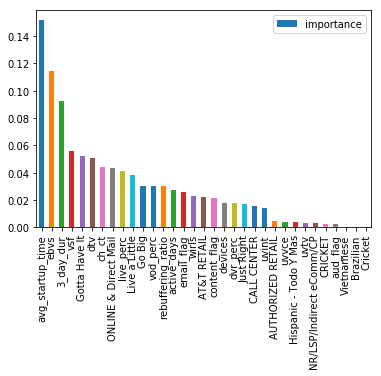

In [19]:
import matplotlib.pyplot as plt
feature_importances = pd.DataFrame(clf.feature_importances_, index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
ax = feature_importances.plot.bar(y='importance', rot=90)

Confusion matrix:
 [[7020 3357]
 [3668 6739]]


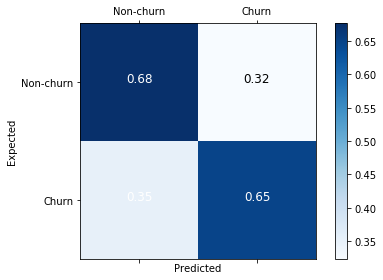

In [19]:
### Confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)
conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

labels = ['Non-churn', 'Churn']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
ax.grid(False)

fmt = '.2f'
thresh = conf_mat.max() / 2.
for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
    plt.text(j, i, format(conf_mat[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf_mat[i, j] > thresh else "black", fontsize = 12)

plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.tight_layout()
plt.show()

In [224]:
print(final.describe())

          day_0_dur     day_1_dur     day_2_dur     day_3_dur           vsf  \
count  83134.000000  83134.000000  83134.000000  83134.000000  83134.000000   
mean       0.011022      0.006611      0.015353      0.012722      0.002519   
std        0.036959      0.020277      0.044072      0.035506      0.012008   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000319      0.003496      0.004188      0.001589   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

               ebvs  avg_startup_time  rebuffering_ratio   sports_flag  \
count  83134.000000      83134.000000       83134.000000  83134.000000   
mean       0.001491       5135.304072           0.007400      0.243138   
std        0.007821       4439.249709           0.041674      0.42

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.6s finished


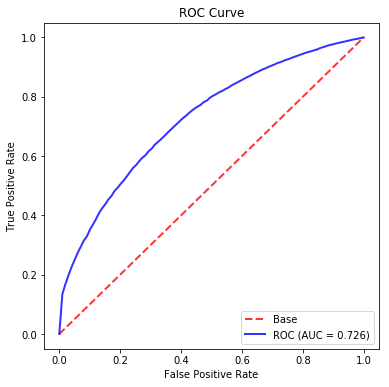

In [20]:
### ROC Curve

from scipy import interp
from sklearn.metrics import roc_curve, auc

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

probas_ = clf.predict_proba(X_test)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Base', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b', label=r'ROC (AUC = %0.3f)' % (mean_auc), lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.grid(False)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

fig = plt.gcf()
fig.set_size_inches(6, 6)

plt.show()

In [39]:


import numpy as np
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 4, 8]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)



{'bootstrap': [True, False],
 'max_depth': [5, 16, 27, 38, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 4, 8],
 'n_estimators': [100, 325, 550, 775, 1000]}


In [40]:


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, scoring = 'roc_auc', param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=3, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 37.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 42.6min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [100, 325, 550, 775, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 16, 27, 38, 50, None], 'min_samples_split': [2, 4, 8], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=3)

In [41]:
### Best params after randomized search
print(rf_random.best_params_)
clf = rf_random.best_estimator_

{'n_estimators': 1000, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 16, 'bootstrap': True}


In [ ]:
{'n_estimators': 1000, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 16, 'bootstrap': True}

In [49]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [50]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6140090613848683


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X_train, y_train)

Accuracy of the GBM on test set: 0.662
             precision    recall  f1-score   support

          0       0.66      0.68      0.67     10377
          1       0.67      0.65      0.66     10407

avg / total       0.66      0.66      0.66     20784



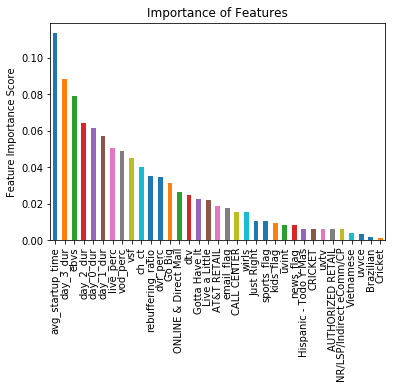

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.grid_search import GridSearchCV


baseline = GradientBoostingClassifier(learning_rate=0.05, n_estimators=500,max_depth=5, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test, y_test)))
pred=baseline.predict(X_test)
print(classification_report(y_test, pred))

In [22]:
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

([mean: 0.66136, std: 0.00287, params: {'learning_rate': 0.15, 'n_estimators': 100},
  mean: 0.66173, std: 0.00298, params: {'learning_rate': 0.15, 'n_estimators': 250},
  mean: 0.66000, std: 0.00232, params: {'learning_rate': 0.15, 'n_estimators': 500},
  mean: 0.65918, std: 0.00256, params: {'learning_rate': 0.15, 'n_estimators': 750},
  mean: 0.65897, std: 0.00360, params: {'learning_rate': 0.15, 'n_estimators': 1000},
  mean: 0.65860, std: 0.00209, params: {'learning_rate': 0.15, 'n_estimators': 1250},
  mean: 0.65793, std: 0.00217, params: {'learning_rate': 0.15, 'n_estimators': 1500},
  mean: 0.65638, std: 0.00147, params: {'learning_rate': 0.15, 'n_estimators': 1750},
  mean: 0.66202, std: 0.00288, params: {'learning_rate': 0.1, 'n_estimators': 100},
  mean: 0.66191, std: 0.00297, params: {'learning_rate': 0.1, 'n_estimators': 250},
  mean: 0.66236, std: 0.00282, params: {'learning_rate': 0.1, 'n_estimators': 500},
  mean: 0.66199, std: 0.00277, params: {'learning_rate': 0.1, 'n_estimators': 750},
  mean: 0.66191, std: 0.00270, params: {'learning_rate': 0.1, 'n_estimators': 1000},
  mean: 0.66173, std: 0.00374, params: {'learning_rate': 0.1, 'n_estimators': 1250},
  mean: 0.66130, std: 0.00261, params: {'learning_rate': 0.1, 'n_estimators': 1500},
  mean: 0.66013, std: 0.00385, params: {'learning_rate': 0.1, 'n_estimators': 1750},
  mean: 0.65743, std: 0.00331, params: {'learning_rate': 0.05, 'n_estimators': 100},
  mean: 0.66268, std: 0.00372, params: {'learning_rate': 0.05, 'n_estimators': 250},
  mean: 0.66350, std: 0.00379, params: {'learning_rate': 0.05, 'n_estimators': 500},
  mean: 0.66252, std: 0.00276, params: {'learning_rate': 0.05, 'n_estimators': 750},
  mean: 0.66200, std: 0.00265, params: {'learning_rate': 0.05, 'n_estimators': 1000},
  mean: 0.66210, std: 0.00241, params: {'learning_rate': 0.05, 'n_estimators': 1250},
  mean: 0.66207, std: 0.00240, params: {'learning_rate': 0.05, 'n_estimators': 1500},
  mean: 0.66130, std: 0.00348, params: {'learning_rate': 0.05, 'n_estimators': 1750},
  mean: 0.64271, std: 0.00152, params: {'learning_rate': 0.01, 'n_estimators': 100},
  mean: 0.65026, std: 0.00249, params: {'learning_rate': 0.01, 'n_estimators': 250},
  mean: 0.65820, std: 0.00248, params: {'learning_rate': 0.01, 'n_estimators': 500},
  mean: 0.66117, std: 0.00321, params: {'learning_rate': 0.01, 'n_estimators': 750},
  mean: 0.66244, std: 0.00295, params: {'learning_rate': 0.01, 'n_estimators': 1000},
  mean: 0.66295, std: 0.00286, params: {'learning_rate': 0.01, 'n_estimators': 1250},
  mean: 0.66306, std: 0.00292, params: {'learning_rate': 0.01, 'n_estimators': 1500},
  mean: 0.66348, std: 0.00302, params: {'learning_rate': 0.01, 'n_estimators': 1750},
  mean: 0.64164, std: 0.00196, params: {'learning_rate': 0.005, 'n_estimators': 100},
  mean: 0.64452, std: 0.00135, params: {'learning_rate': 0.005, 'n_estimators': 250},
  mean: 0.65052, std: 0.00237, params: {'learning_rate': 0.005, 'n_estimators': 500},
  mean: 0.65511, std: 0.00188, params: {'learning_rate': 0.005, 'n_estimators': 750},
  mean: 0.65846, std: 0.00249, params: {'learning_rate': 0.005, 'n_estimators': 1000},
  mean: 0.65992, std: 0.00273, params: {'learning_rate': 0.005, 'n_estimators': 1250},
  mean: 0.66074, std: 0.00270, params: {'learning_rate': 0.005, 'n_estimators': 1500},
  mean: 0.66236, std: 0.00324, params: {'learning_rate': 0.005, 'n_estimators': 1750},
  mean: 0.64069, std: 0.00218, params: {'learning_rate': 0.001, 'n_estimators': 100},
  mean: 0.64119, std: 0.00149, params: {'learning_rate': 0.001, 'n_estimators': 250},
  mean: 0.64249, std: 0.00158, params: {'learning_rate': 0.001, 'n_estimators': 500},
  mean: 0.64294, std: 0.00179, params: {'learning_rate': 0.001, 'n_estimators': 750},
  mean: 0.64433, std: 0.00213, params: {'learning_rate': 0.001, 'n_estimators': 1000},
  mean: 0.64488, std: 0.00197, params: {'learning_rate': 0.001, 'n_estimators': 1250},
  mean: 0.64624, std: 0.00154, params: {'learning_rate': 0.001, 'n_estimators': 1500},
  mean: 0.64694, std: 0.00181, params: {'learning_rate': 0.001, 'n_estimators': 1750}],
 {'learning_rate': 0.05, 'n_estimators': 500},
 0.663496391339214)

([mean: 0.66136, std: 0.00287, params: {'learning_rate': 0.15, 'n_estimators': 100},
  mean: 0.66173, std: 0.00298, params: {'learning_rate': 0.15, 'n_estimators': 250},
  mean: 0.66000, std: 0.00232, params: {'learning_rate': 0.15, 'n_estimators': 500},
  mean: 0.65918, std: 0.00256, params: {'learning_rate': 0.15, 'n_estimators': 750},
  mean: 0.65897, std: 0.00360, params: {'learning_rate': 0.15, 'n_estimators': 1000},
  mean: 0.65860, std: 0.00209, params: {'learning_rate': 0.15, 'n_estimators': 1250},
  mean: 0.65793, std: 0.00217, params: {'learning_rate': 0.15, 'n_estimators': 1500},
  mean: 0.65638, std: 0.00147, params: {'learning_rate': 0.15, 'n_estimators': 1750},
  mean: 0.66202, std: 0.00288, params: {'learning_rate': 0.1, 'n_estimators': 100},
  mean: 0.66191, std: 0.00297, params: {'learning_rate': 0.1, 'n_estimators': 250},
  mean: 0.66236, std: 0.00282, params: {'learning_rate': 0.1, 'n_estimators': 500},
  mean: 0.66199, std: 0.00277, params: {'learning_rate': 0.1, 'n

In [25]:
p_test2 = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.05,n_estimators=500, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

([mean: 0.65424, std: 0.00352, params: {'max_depth': 2},
  mean: 0.66135, std: 0.00306, params: {'max_depth': 3},
  mean: 0.66350, std: 0.00379, params: {'max_depth': 4},
  mean: 0.66454, std: 0.00283, params: {'max_depth': 5},
  mean: 0.66310, std: 0.00256, params: {'max_depth': 6},
  mean: 0.66313, std: 0.00170, params: {'max_depth': 7}],
 {'max_depth': 5},
 0.6645388933440256)

([mean: 0.65424, std: 0.00352, params: {'max_depth': 2},
  mean: 0.66135, std: 0.00306, params: {'max_depth': 3},
  mean: 0.66350, std: 0.00379, params: {'max_depth': 4},
  mean: 0.66454, std: 0.00283, params: {'max_depth': 5},
  mean: 0.66310, std: 0.00256, params: {'max_depth': 6},
  mean: 0.66313, std: 0.00170, params: {'max_depth': 7}],
 {'max_depth': 5},
 0.6645388933440256)

In [27]:
p_test4 = {'min_samples_split':[2,4,6,8,10,20,40,60,100], 'min_samples_leaf':[1,3,5,7,9]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.05, n_estimators=500,max_depth=5, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test4, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

([mean: 0.66454, std: 0.00283, params: {'min_samples_leaf': 1, 'min_samples_split': 2},
  mean: 0.66443, std: 0.00269, params: {'min_samples_leaf': 1, 'min_samples_split': 4},
  mean: 0.66417, std: 0.00213, params: {'min_samples_leaf': 1, 'min_samples_split': 6},
  mean: 0.66488, std: 0.00257, params: {'min_samples_leaf': 1, 'min_samples_split': 8},
  mean: 0.66472, std: 0.00298, params: {'min_samples_leaf': 1, 'min_samples_split': 10},
  mean: 0.66420, std: 0.00320, params: {'min_samples_leaf': 1, 'min_samples_split': 20},
  mean: 0.66295, std: 0.00264, params: {'min_samples_leaf': 1, 'min_samples_split': 40},
  mean: 0.66340, std: 0.00355, params: {'min_samples_leaf': 1, 'min_samples_split': 60},
  mean: 0.66361, std: 0.00324, params: {'min_samples_leaf': 1, 'min_samples_split': 100},
  mean: 0.66366, std: 0.00221, params: {'min_samples_leaf': 3, 'min_samples_split': 2},
  mean: 0.66366, std: 0.00221, params: {'min_samples_leaf': 3, 'min_samples_split': 4},
  mean: 0.66366, std: 0.00221, params: {'min_samples_leaf': 3, 'min_samples_split': 6},
  mean: 0.66435, std: 0.00283, params: {'min_samples_leaf': 3, 'min_samples_split': 8},
  mean: 0.66433, std: 0.00133, params: {'min_samples_leaf': 3, 'min_samples_split': 10},
  mean: 0.66427, std: 0.00307, params: {'min_samples_leaf': 3, 'min_samples_split': 20},
  mean: 0.66359, std: 0.00378, params: {'min_samples_leaf': 3, 'min_samples_split': 40},
  mean: 0.66257, std: 0.00323, params: {'min_samples_leaf': 3, 'min_samples_split': 60},
  mean: 0.66225, std: 0.00290, params: {'min_samples_leaf': 3, 'min_samples_split': 100},
  mean: 0.66460, std: 0.00220, params: {'min_samples_leaf': 5, 'min_samples_split': 2},
  mean: 0.66460, std: 0.00220, params: {'min_samples_leaf': 5, 'min_samples_split': 4},
  mean: 0.66460, std: 0.00220, params: {'min_samples_leaf': 5, 'min_samples_split': 6},
  mean: 0.66460, std: 0.00220, params: {'min_samples_leaf': 5, 'min_samples_split': 8},
  mean: 0.66460, std: 0.00220, params: {'min_samples_leaf': 5, 'min_samples_split': 10},
  mean: 0.66438, std: 0.00323, params: {'min_samples_leaf': 5, 'min_samples_split': 20},
  mean: 0.66300, std: 0.00355, params: {'min_samples_leaf': 5, 'min_samples_split': 40},
  mean: 0.66265, std: 0.00284, params: {'min_samples_leaf': 5, 'min_samples_split': 60},
  mean: 0.66284, std: 0.00266, params: {'min_samples_leaf': 5, 'min_samples_split': 100},
  mean: 0.66425, std: 0.00292, params: {'min_samples_leaf': 7, 'min_samples_split': 2},
  mean: 0.66425, std: 0.00292, params: {'min_samples_leaf': 7, 'min_samples_split': 4},
  mean: 0.66425, std: 0.00292, params: {'min_samples_leaf': 7, 'min_samples_split': 6},
  mean: 0.66425, std: 0.00292, params: {'min_samples_leaf': 7, 'min_samples_split': 8},
  mean: 0.66425, std: 0.00292, params: {'min_samples_leaf': 7, 'min_samples_split': 10},
  mean: 0.66486, std: 0.00190, params: {'min_samples_leaf': 7, 'min_samples_split': 20},
  mean: 0.66340, std: 0.00259, params: {'min_samples_leaf': 7, 'min_samples_split': 40},
  mean: 0.66319, std: 0.00377, params: {'min_samples_leaf': 7, 'min_samples_split': 60},
  mean: 0.66313, std: 0.00341, params: {'min_samples_leaf': 7, 'min_samples_split': 100},
  mean: 0.66391, std: 0.00240, params: {'min_samples_leaf': 9, 'min_samples_split': 2},
  mean: 0.66391, std: 0.00240, params: {'min_samples_leaf': 9, 'min_samples_split': 4},
  mean: 0.66391, std: 0.00240, params: {'min_samples_leaf': 9, 'min_samples_split': 6},
  mean: 0.66391, std: 0.00240, params: {'min_samples_leaf': 9, 'min_samples_split': 8},
  mean: 0.66391, std: 0.00240, params: {'min_samples_leaf': 9, 'min_samples_split': 10},
  mean: 0.66460, std: 0.00311, params: {'min_samples_leaf': 9, 'min_samples_split': 20},
  mean: 0.66220, std: 0.00295, params: {'min_samples_leaf': 9, 'min_samples_split': 40},
  mean: 0.66338, std: 0.00342, params: {'min_samples_leaf': 9, 'min_samples_split': 60},
  mean: 0.66298, std: 0.00245, params: {'min_samples_leaf': 9, 'min_samples_split': 100}],
 {'min_samples_leaf': 1, 'min_samples_split': 8},
 0.6648757016840418)

([mean: 0.66454, std: 0.00283, params: {'min_samples_leaf': 1, 'min_samples_split': 2},
  mean: 0.66443, std: 0.00269, params: {'min_samples_leaf': 1, 'min_samples_split': 4},
  mean: 0.66417, std: 0.00213, params: {'min_samples_leaf': 1, 'min_samples_split': 6},
  mean: 0.66488, std: 0.00257, params: {'min_samples_leaf': 1, 'min_samples_split': 8},
  mean: 0.66472, std: 0.00298, params: {'min_samples_leaf': 1, 'min_samples_split': 10},
  mean: 0.66420, std: 0.00320, params: {'min_samples_leaf': 1, 'min_samples_split': 20},
  mean: 0.66295, std: 0.00264, params: {'min_samples_leaf': 1, 'min_samples_split': 40},
  mean: 0.66340, std: 0.00355, params: {'min_samples_leaf': 1, 'min_samples_split': 60},
  mean: 0.66361, std: 0.00324, params: {'min_samples_leaf': 1, 'min_samples_split': 100},
  mean: 0.66366, std: 0.00221, params: {'min_samples_leaf': 3, 'min_samples_split': 2},
  mean: 0.66366, std: 0.00221, params: {'min_samples_leaf': 3, 'min_samples_split': 4},
  mean: 0.66366, std: 0.00

In [28]:
#TUNING MAX FEATURES
p_test5 = {'max_features':[2,3,4,5,6,7]}
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.05, n_estimators=500,max_depth=5, min_samples_split=8, min_samples_leaf=1, subsample=1, random_state=10), 
param_grid = p_test5, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

([mean: 0.66314, std: 0.00120, params: {'max_features': 2},
  mean: 0.66194, std: 0.00252, params: {'max_features': 3},
  mean: 0.66353, std: 0.00396, params: {'max_features': 4},
  mean: 0.66488, std: 0.00257, params: {'max_features': 5},
  mean: 0.66383, std: 0.00275, params: {'max_features': 6},
  mean: 0.66489, std: 0.00292, params: {'max_features': 7}],
 {'max_features': 7},
 0.6648917401764234)

([mean: 0.66314, std: 0.00120, params: {'max_features': 2},
  mean: 0.66194, std: 0.00252, params: {'max_features': 3},
  mean: 0.66353, std: 0.00396, params: {'max_features': 4},
  mean: 0.66488, std: 0.00257, params: {'max_features': 5},
  mean: 0.66383, std: 0.00275, params: {'max_features': 6},
  mean: 0.66489, std: 0.00292, params: {'max_features': 7}],
 {'max_features': 7},
 0.6648917401764234)

In [29]:
p_test6= {'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.05, n_estimators=500,max_depth=5, min_samples_split=8, min_samples_leaf=1,max_features=7, random_state=10), 
param_grid = p_test6, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

([mean: 0.66455, std: 0.00253, params: {'subsample': 0.7},
  mean: 0.66545, std: 0.00218, params: {'subsample': 0.75},
  mean: 0.66513, std: 0.00253, params: {'subsample': 0.8},
  mean: 0.66529, std: 0.00161, params: {'subsample': 0.85},
  mean: 0.66532, std: 0.00264, params: {'subsample': 0.9},
  mean: 0.66582, std: 0.00238, params: {'subsample': 0.95},
  mean: 0.66489, std: 0.00292, params: {'subsample': 1}],
 {'subsample': 0.95},
 0.665821972734563)

([mean: 0.66455, std: 0.00253, params: {'subsample': 0.7},
  mean: 0.66545, std: 0.00218, params: {'subsample': 0.75},
  mean: 0.66513, std: 0.00253, params: {'subsample': 0.8},
  mean: 0.66529, std: 0.00161, params: {'subsample': 0.85},
  mean: 0.66532, std: 0.00264, params: {'subsample': 0.9},
  mean: 0.66582, std: 0.00238, params: {'subsample': 0.95},
  mean: 0.66489, std: 0.00292, params: {'subsample': 1}],
 {'subsample': 0.95},
 0.665821972734563)

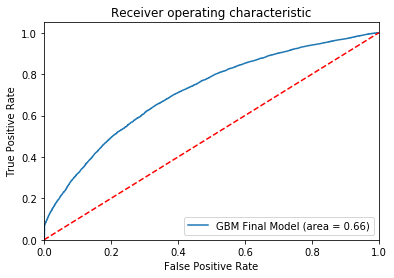

In [97]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.ensemble import GradientBoostingClassifier

#run models
new=GradientBoostingClassifier(learning_rate=0.05, n_estimators=500,max_depth=5, min_samples_split=8, min_samples_leaf=1,max_features=7 , subsample=0.95, random_state=10)
new.fit(X_train,y_train)

#calculate values for ROC AUC plot
#new tuned model 
new_roc_auc = roc_auc_score(y_test, new.predict(X_test))
fprnew, tprnew, thresholds_new = roc_curve(y_test, new.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fprnew, tprnew, label='GBM Final Model (area = %0.2f)' % new_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Accuracy of the GBM on test set: 0.658
             precision    recall  f1-score   support

          0       0.65      0.67      0.66     10336
          1       0.66      0.64      0.65     10446

avg / total       0.66      0.66      0.66     20782



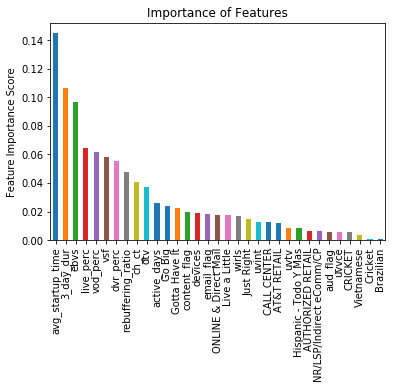

In [98]:
predictors=list(X_train)
feat_imp = pd.Series(new.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(new.score(X_test, y_test)))
pred=new.predict(X_test)
print(classification_report(y_test, pred))

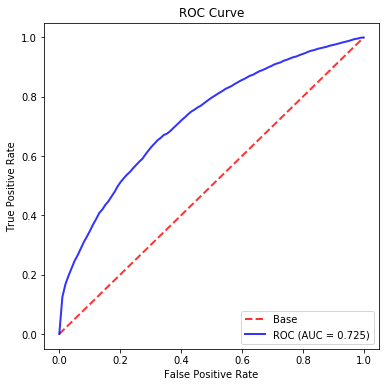

In [32]:
### ROC Curve

from scipy import interp
from sklearn.metrics import roc_curve, auc

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

probas_ = new.predict_proba(X_test)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Base', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b', label=r'ROC (AUC = %0.3f)' % (mean_auc), lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.grid(False)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

fig = plt.gcf()
fig.set_size_inches(6, 6)

plt.show()

In [ ]:
add sept

check

chat data (vishnu)
device  device_dim(Ira)
ct stereams >3min & <3min (next table)

overlapping channels aka DTVNOW only channels